# CUSTOMER CHURN PREDICTION PROJECT

## Explanatory Data Analysis (EDA) 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/aleynacakir/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Load the dataset
file_path = 'Churn_Data.xlsx'
data = pd.read_excel(file_path)

In [3]:
data.dtypes

Sıra                                  int64
CHRN_MUST_TERK                        int64
musteri_terk_drm                      int64
musterilik_yas                        int64
Maas_Flag                             int64
must_hesap_sube_sayi                  int64
kanuni_Takip_Drm                      int64
Hesap_Isl_Ucret_Flag                  int64
Vdsz_Deg_1                          float64
Vdsz_Deg_2                          float64
Vdli_Deg_1                          float64
Vdli_Deg_2                          float64
KK_borc_Deg_V1                      float64
KK_borc_Deg_V2                      float64
Borc_Degisim_V1                      object
Borc_Degisim_V2                      object
GecikmeFlag_Degisim_V1                int64
GecikmeFlag_Degisim_V2                int64
KKISL_Tut_Degisim_V1                float64
KKISL_Tut_Degisim_V2                float64
KKISL_SY_Degisim_V1                 float64
KKISL_SY_Degisim_V2                 float64
HarcananPuan_Degisim_V1         

The uploaded dataset contains 12,931 rows and 36 columns. Meanings of columns:

- **Sıra**: A unique identifier for each customer.
- **CHRN_MUST_TERK**: A flag indicating whether the customer has left the company (1 = Left, 0 = Not Left).
- **musteri_terk_drm**: The customer's churn status.
- **musterilik_yas**: The number of years the customer has been with the company.
- **Maas_Flag**: Indicates whether the customer receives a salary.
- **must_hesap_sube_sayi**: The number of branches the customer's accounts are linked to.
- **kanuni_Takip_Drm**: Indicates whether the customer is under legal proceedings.
- **Hesap_Isl_Ucret_Flag**: The status of account management fee payment.
- **Vdsz_Degisim_V1, Vdsz_Degisim_V2, etc.**: The changes in various financial statuses of the customer (debts, expenses, number of products, etc.). V1 and V2 versions may represent changes over different time periods.
- **CHRN_SIKAYET_SON_AY_SAYI, CHRN_SIKAYET_SON_3AY_SAYI, CHRN_SIKAYET_SON_6AY_SAYI**: The number of complaints made by the customer in the last 1, 3, and 6 months.
- **ref_yas, ref_meslek, ref_egitimdurum, ref_medenidurum, Cinsiyet**: Demographic information such as age, occupation, education level, marital status, and gender.

This data can be used to predict customer churn. When building a model to determine which customers are likely to leave, meaningful relationships between these columns can be explored.

In [4]:
# Display basic info
print("Basic information about the data:")
print(data.info(), "\n")

# Display the first few rows
print("First few rows of the data:")
print(data.head(), "\n")

# Summary statistics
print("Summary statistics:")
print(data.describe(), "\n")

# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum(), "\n")

Basic information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12931 entries, 0 to 12930
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sıra                              12931 non-null  int64  
 1   CHRN_MUST_TERK                    12931 non-null  int64  
 2   musteri_terk_drm                  12931 non-null  int64  
 3   musterilik_yas                    12931 non-null  int64  
 4   Maas_Flag                         12931 non-null  int64  
 5   must_hesap_sube_sayi              12931 non-null  int64  
 6   kanuni_Takip_Drm                  12931 non-null  int64  
 7   Hesap_Isl_Ucret_Flag              12931 non-null  int64  
 8   Vdsz_Deg_1                        12931 non-null  float64
 9   Vdsz_Deg_2                        12931 non-null  float64
 10  Vdli_Deg_1                        12931 non-null  float64
 11  Vdli_Deg_2                       

## Removing Irrelevant Variables

In [5]:
data.drop(columns=['CHRN_SIKAYET_SON_AY_SAYI','CHRN_SIKAYET_SON_3AY_SAYI',\
                   'CHRN_SIKAYET_SON_6AY_SAYI','CHRN_SIKAYET_SON_12AY_SAYI'],axis=1,inplace=True)

In [6]:
data.drop(columns=['Sıra', 'musteri_terk_drm'],axis=1,inplace=True)

In [7]:
data.columns

Index(['CHRN_MUST_TERK', 'musterilik_yas', 'Maas_Flag', 'must_hesap_sube_sayi',
       'kanuni_Takip_Drm', 'Hesap_Isl_Ucret_Flag', 'Vdsz_Deg_1', 'Vdsz_Deg_2',
       'Vdli_Deg_1', 'Vdli_Deg_2', 'KK_borc_Deg_V1', 'KK_borc_Deg_V2',
       'Borc_Degisim_V1', 'Borc_Degisim_V2', 'GecikmeFlag_Degisim_V1',
       'GecikmeFlag_Degisim_V2', 'KKISL_Tut_Degisim_V1',
       'KKISL_Tut_Degisim_V2', 'KKISL_SY_Degisim_V1', 'KKISL_SY_Degisim_V2',
       'HarcananPuan_Degisim_V1', 'HarcananPuan_Degisim_V2',
       'AcıkUrunAdet_Degisim_V1', 'AcıkUrunAdet_Degisim_V2',
       'CHRN_MUST_YAKIN_IZLEME_ACIK_FLAG', 'ref_yas', 'ref_meslek',
       'ref_egitimdurum', 'ref_medenidurum', 'Cinsiyet'],
      dtype='object')

In [8]:
data.dtypes

CHRN_MUST_TERK                        int64
musterilik_yas                        int64
Maas_Flag                             int64
must_hesap_sube_sayi                  int64
kanuni_Takip_Drm                      int64
Hesap_Isl_Ucret_Flag                  int64
Vdsz_Deg_1                          float64
Vdsz_Deg_2                          float64
Vdli_Deg_1                          float64
Vdli_Deg_2                          float64
KK_borc_Deg_V1                      float64
KK_borc_Deg_V2                      float64
Borc_Degisim_V1                      object
Borc_Degisim_V2                      object
GecikmeFlag_Degisim_V1                int64
GecikmeFlag_Degisim_V2                int64
KKISL_Tut_Degisim_V1                float64
KKISL_Tut_Degisim_V2                float64
KKISL_SY_Degisim_V1                 float64
KKISL_SY_Degisim_V2                 float64
HarcananPuan_Degisim_V1             float64
HarcananPuan_Degisim_V2             float64
AcıkUrunAdet_Degisim_V1         

In [9]:
data['Borc_Degisim_V1'] = data['Borc_Degisim_V1'].apply(pd.to_numeric, errors='coerce')
data['Borc_Degisim_V2'] = data['Borc_Degisim_V2'].apply(pd.to_numeric, errors='coerce')

## Handling Missing Values

In [10]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum(), "\n")

Missing values in each column:
CHRN_MUST_TERK                       0
musterilik_yas                       0
Maas_Flag                            0
must_hesap_sube_sayi                 0
kanuni_Takip_Drm                     0
Hesap_Isl_Ucret_Flag                 0
Vdsz_Deg_1                           0
Vdsz_Deg_2                           0
Vdli_Deg_1                           0
Vdli_Deg_2                           0
KK_borc_Deg_V1                       0
KK_borc_Deg_V2                       0
Borc_Degisim_V1                     76
Borc_Degisim_V2                     69
GecikmeFlag_Degisim_V1               0
GecikmeFlag_Degisim_V2               0
KKISL_Tut_Degisim_V1                 0
KKISL_Tut_Degisim_V2                 0
KKISL_SY_Degisim_V1                  0
KKISL_SY_Degisim_V2                  0
HarcananPuan_Degisim_V1              0
HarcananPuan_Degisim_V2              0
AcıkUrunAdet_Degisim_V1              0
AcıkUrunAdet_Degisim_V2              0
CHRN_MUST_YAKIN_IZLEME_ACIK_FLAG 

In [11]:
data = data.dropna()

In [12]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum(), "\n")

Missing values in each column:
CHRN_MUST_TERK                      0
musterilik_yas                      0
Maas_Flag                           0
must_hesap_sube_sayi                0
kanuni_Takip_Drm                    0
Hesap_Isl_Ucret_Flag                0
Vdsz_Deg_1                          0
Vdsz_Deg_2                          0
Vdli_Deg_1                          0
Vdli_Deg_2                          0
KK_borc_Deg_V1                      0
KK_borc_Deg_V2                      0
Borc_Degisim_V1                     0
Borc_Degisim_V2                     0
GecikmeFlag_Degisim_V1              0
GecikmeFlag_Degisim_V2              0
KKISL_Tut_Degisim_V1                0
KKISL_Tut_Degisim_V2                0
KKISL_SY_Degisim_V1                 0
KKISL_SY_Degisim_V2                 0
HarcananPuan_Degisim_V1             0
HarcananPuan_Degisim_V2             0
AcıkUrunAdet_Degisim_V1             0
AcıkUrunAdet_Degisim_V2             0
CHRN_MUST_YAKIN_IZLEME_ACIK_FLAG    0
ref_yas            

## Removing Duplicates 

In [13]:
import pandas as pd

before_shape = data.shape

# Remove duplicates
data = data.drop_duplicates()

# Display the shape of the dataset before and after removing duplicates
after_shape = data.shape

before_shape, after_shape


((12786, 30), (12483, 30))

**No duplicates**

In [14]:
data.duplicated().sum()

0

## Unique Values

In [15]:
# Check for unique values in each column
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}': {unique_values}")
    print()

Unique values in 'CHRN_MUST_TERK': [0 1]

Unique values in 'musterilik_yas': [ 42  55  30  15 202  41 256  19  80  82 183 204 100  11 231  16 190 146
  36  34 141 185 172  71 192 119 176 154 164 162 229 189 108 211 208 294
 179 151 142  70  45 262  37 116   0 152 169 271 148 157  38 178 274 101
   9 186  63  14 187  94 302 226 201 182 153   7 329 175  59 170   2  75
 112  22   6  47  12  48 292  51 275  17 265  57 173  78 233  99 138 241
  10  81 181 156 128  40 174 209  13  23 149 117  77 184  76 199 268  62
 309   3 219 230  28  50  74 122 124 113 143  20  96 102 198 232 218   1
 263  64 220 180  35 296 194 159  69  25 131 140  58 188  87 134  88 161
 306 158  61 107 137 214 217 160 166  52 132 244  79 125 171  97 155  39
 105 144 129 163  21  56 247 104  73 207   4 121 118   8 126  85 133  53
  67 273  43  92 237  26 147 277 168  31  86 145 191  33 264  90 224   5
 136 253 197  46 269 272  60 130  54 103 111 228 243  68 276 115 195 260
 290 235 110  93 216 127 203 283  83  27 123 25

# Data Preprocessing 

* Feature Engineering
* Scale Features
* Handle Imbalanced Data

## Column-Wise Data Analysis and Outlier Handling

In [16]:
import numpy as np  
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from scipy.stats import zscore

# Outliers Treatment
# Detecting outliers using Z-Score method

numeric_col_names = ['musterilik_yas','Vdsz_Deg_1', 'Vdsz_Deg_2','Vdli_Deg_1','Vdli_Deg_2', 'KK_borc_Deg_V1',\
                     'KK_borc_Deg_V2','Borc_Degisim_V1', 'Borc_Degisim_V2', 'KKISL_Tut_Degisim_V1', \
                     'KKISL_Tut_Degisim_V2','KKISL_SY_Degisim_V1', 'KKISL_SY_Degisim_V2', \
                     'AcıkUrunAdet_Degisim_V1',\
                     'AcıkUrunAdet_Degisim_V2','ref_yas']

numeric_cols = data[numeric_col_names].columns
z_scores = np.abs(zscore(data[numeric_cols]))
outliers = (z_scores > 3).any(axis=1)

# Remove rows that are considered outliers
data_no_outliers = data[~outliers]

**Local Outlier Factor (LOF)**

* n_neighbors=20: The number of neighbors considered by LOF.contamination=0.1: The proportion of outliers expected in the data. You can adjust this parameter based on your dataset.

* The LOF algorithm labels each data point as either an inlier (1) or an outlier (-1). We then filter out the outliers from the dataset.


In [17]:
#Local Outlier Factor (LOF) Analysis
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_outliers = lof.fit_predict(data_no_outliers[numeric_cols])

# LOF labels -1 as outliers, so we keep only the inliers (labeled as 1)
data_no_outliers_lof = data_no_outliers[lof_outliers == 1]

**DBSCAN**
* After applying LOF, we also apply DBSCAN to detect and remove additional outliers. The eps parameter defines the maximum distance between two samples for them to be considered as in the same neighborhood, and min_samples is the number of samples in a neighborhood for a point to be considered a core point. Points that don't meet these criteria are labeled as noise and removed.

In [18]:
# Apply DBSCAN for additional outlier detection
# Standardizing data for DBSCAN

shape = data.shape 
print(shape)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_no_outliers_lof[numeric_cols])

# Applying DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Keeping only the points labeled as core or border points (label 0 or above)
data= data_no_outliers_lof[dbscan_labels >= 0]

# Display the shape of the dataset after outlier treatment
data.shape



(12483, 30)


(9846, 30)

In [19]:
# Check for unique values in each column
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}': {unique_values}")
    print()

Unique values in 'CHRN_MUST_TERK': [0 1]

Unique values in 'musterilik_yas': [ 42  55  30  15 202  41 256  19  82 183 204  11  34 141 185 172 192 119
 176 154 164 229 189 211 179 151 142  70  45 262  37 116   0 169 271 148
 157 274 101   9 186  63  14 187  94 302 226 201 182 153   7 175  59 170
   2  75 112  22  47  12  51 275  17 265  57 190 173  78  99 138  10 181
 156 128  40 174 209  13 149 117  77 184  76 268  62   3 219 230  28  50
 122  71 124  81 113 143  20  96 102 198 218   1  36 263  64 220  23 180
  35 296 194 159  69  25 131 140  58 188  87 162 134  88 161 306 158  61
 107 137 214 217 160  52  48  79 125 171  97 155  39 144 163 104  56  73
   4   8  85  67 273  43  92 199  21 237  26  16 168  31  86 152 191  53
  33 264  90 224   5 136 253 126  46 269 272  60 147 130 329 103 111 228
 243 276 115 260 290 235 178 110  93 105 108 207 216 127 244 283  83  27
 277 251  38 146  49 129  68  84 197  95  24 210  74 221 177 239 208  18
 259 254 308 139  89 310  54 331 166  91 250 22

## Feature Encoding with One Hot Encoding

* Feature encoding techniques converts categorical data (like labels) into numbers that algorithms understand. This is essential because algorithms work with numbers, ensuring valuable info from categories isn't lost.
* There are many variables, which needs to be encoded.
* One Hot Encoding is applied becuase these variables have less number of categories.

In [20]:
categorical_columns = data.select_dtypes(include=['object']).columns 
categorical_columns

data = pd.get_dummies(data, columns=['ref_meslek', 'ref_egitimdurum', 'ref_medenidurum', 'Cinsiyet',\
                                    'Hesap_Isl_Ucret_Flag','GecikmeFlag_Degisim_V1','GecikmeFlag_Degisim_V2'],\
                                     drop_first = True)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9846 entries, 0 to 12930
Data columns (total 62 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CHRN_MUST_TERK                     9846 non-null   int64  
 1   musterilik_yas                     9846 non-null   int64  
 2   Maas_Flag                          9846 non-null   int64  
 3   must_hesap_sube_sayi               9846 non-null   int64  
 4   kanuni_Takip_Drm                   9846 non-null   int64  
 5   Vdsz_Deg_1                         9846 non-null   float64
 6   Vdsz_Deg_2                         9846 non-null   float64
 7   Vdli_Deg_1                         9846 non-null   float64
 8   Vdli_Deg_2                         9846 non-null   float64
 9   KK_borc_Deg_V1                     9846 non-null   float64
 10  KK_borc_Deg_V2                     9846 non-null   float64
 11  Borc_Degisim_V1                    9846 non-null   float64
 

## Distribution of Data
By understanding the data distribution, we can choose appropriate strategies to handle imbalances, outliers, or other issues. 

In [21]:
data.shape

(9846, 62)

In [22]:
# Selecting appropriate bin size using sturges_rule

import math

def sturges_rule(num_data_points):
    k = 1 + math.log2(num_data_points)
    return int(k)

# Example usage
num_data_points = data.shape[0]
bins = sturges_rule(num_data_points)
print("Number of bins according to Sturges' Rule:", bins)

Number of bins according to Sturges' Rule: 14


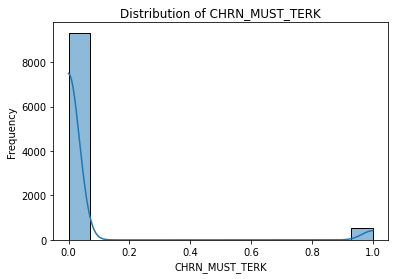

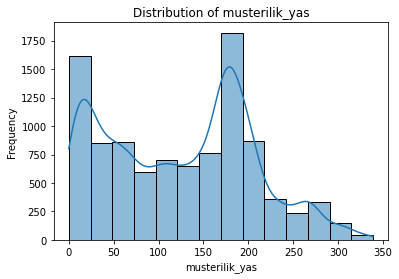

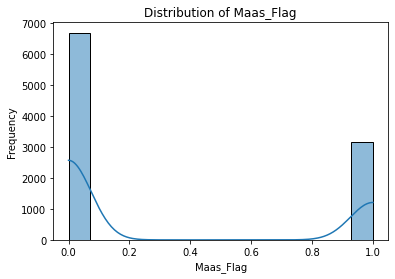

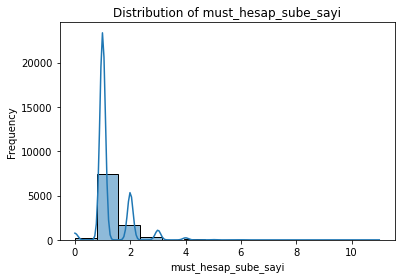

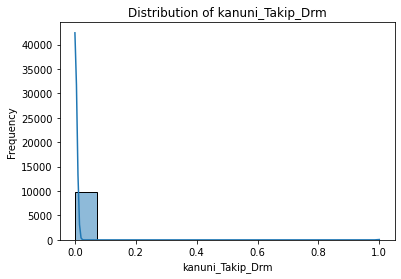

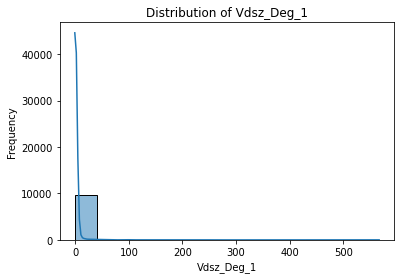

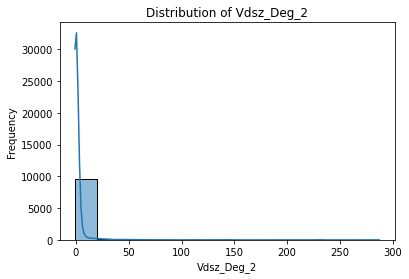

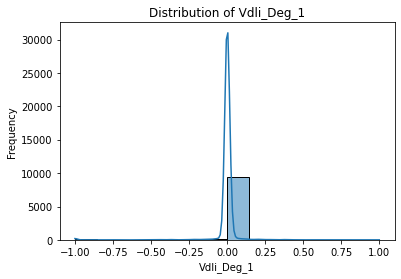

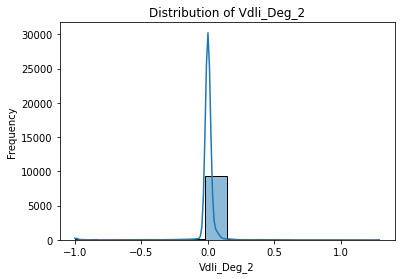

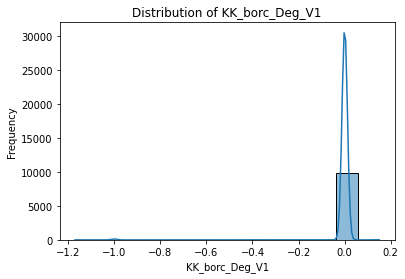

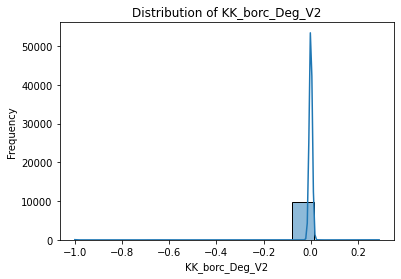

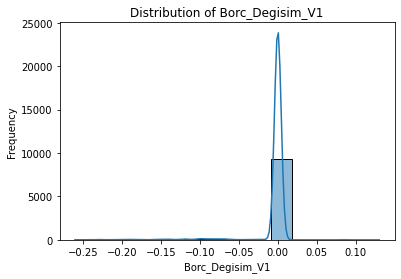

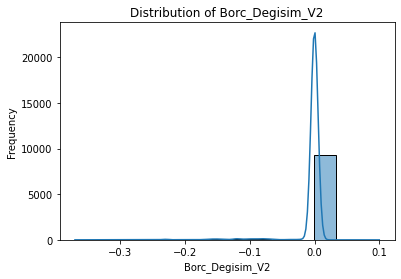

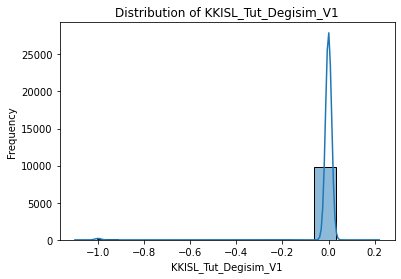

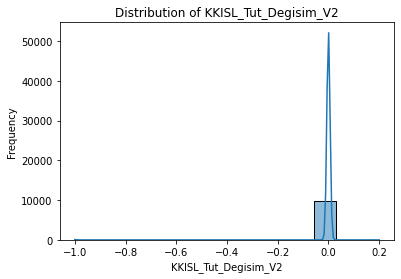

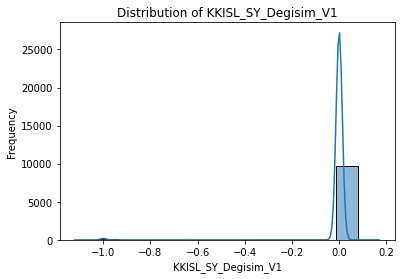

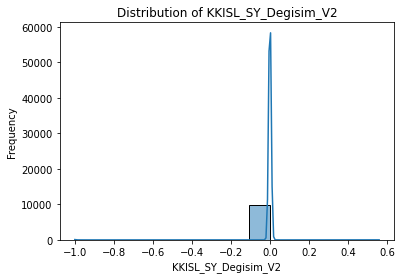

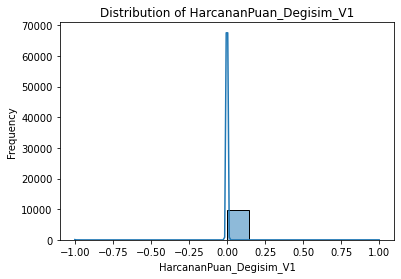

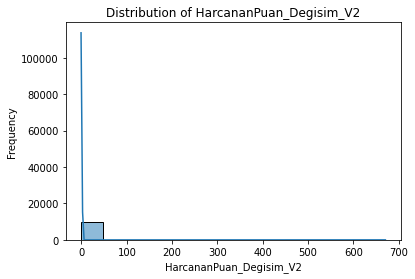

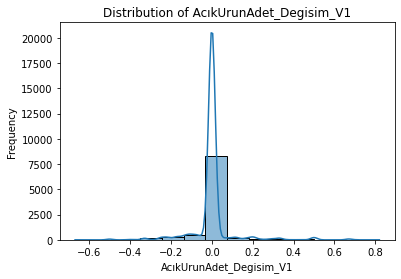

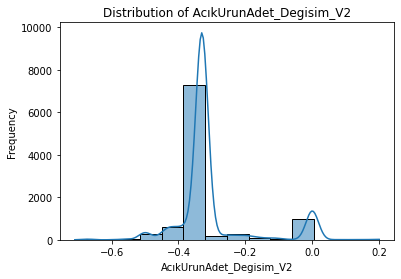

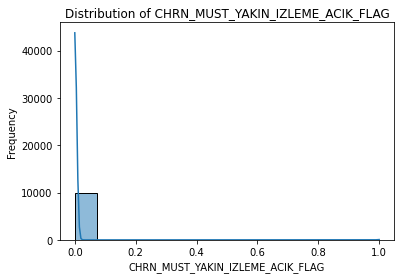

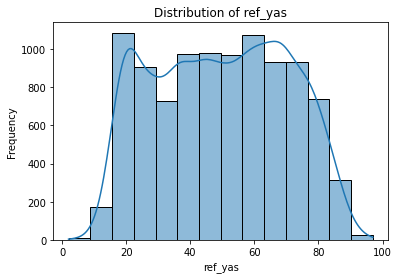

In [23]:
# Checking distribution of all continuous variables
continuous_binary_vars = data.select_dtypes(include=['float64', 'int64']).columns

# Plotting the distribution of each continuous variable
for var in continuous_binary_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=data, x=var, bins=14, kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    plt.show()

In [24]:
# Checking skewness of all continuous variables
data[continuous_binary_vars].skew()

CHRN_MUST_TERK                       4.013080
musterilik_yas                       0.130808
Maas_Flag                            0.772222
must_hesap_sube_sayi                 2.512170
kanuni_Takip_Drm                    24.007370
Vdsz_Deg_1                          20.570276
Vdsz_Deg_2                          11.737504
Vdli_Deg_1                          -5.891699
Vdli_Deg_2                          -4.927288
KK_borc_Deg_V1                     -12.906254
KK_borc_Deg_V2                     -19.929980
Borc_Degisim_V1                     -5.676305
Borc_Degisim_V2                     -6.159281
KKISL_Tut_Degisim_V1               -11.918897
KKISL_Tut_Degisim_V2               -23.221244
KKISL_SY_Degisim_V1                -11.934577
KKISL_SY_Degisim_V2                -19.666663
HarcananPuan_Degisim_V1            -25.680209
HarcananPuan_Degisim_V2             99.226598
AcıkUrunAdet_Degisim_V1              1.922326
AcıkUrunAdet_Degisim_V2              1.658675
CHRN_MUST_YAKIN_IZLEME_ACIK_FLAG  

**Data has all sorts of normally distributed (skewed), right Skewed (Positive Skewed) \
and left skewed (negative skewed).**

## Graphs

**Bar Plots**

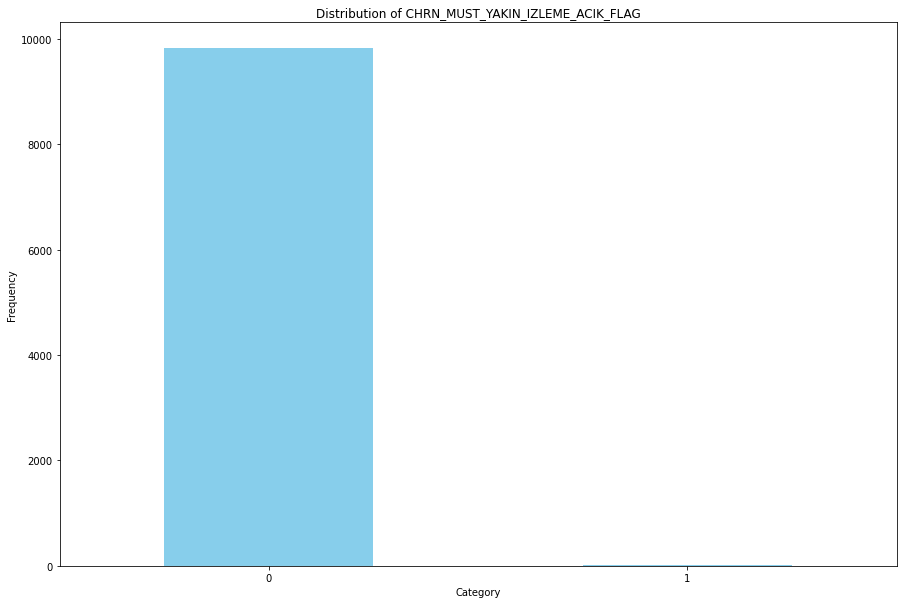

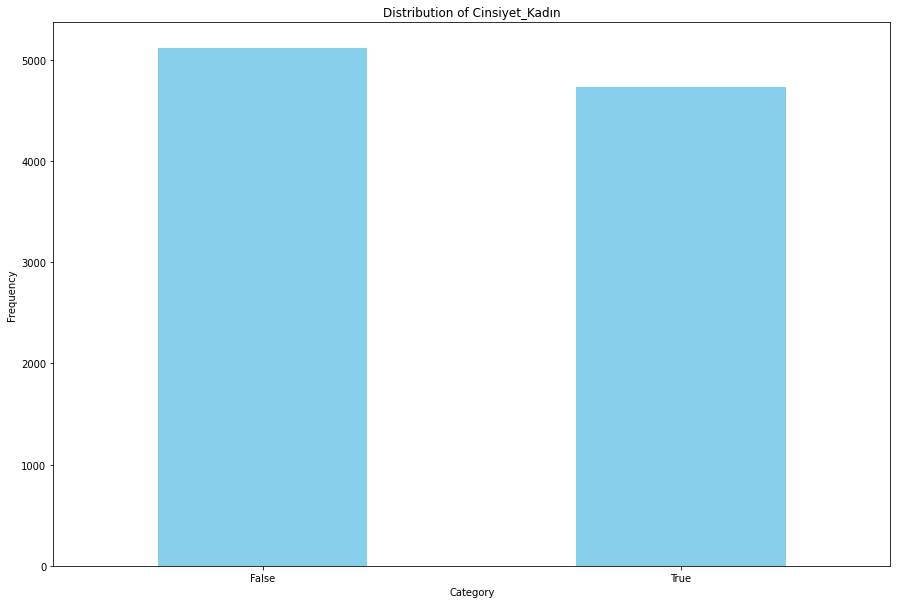

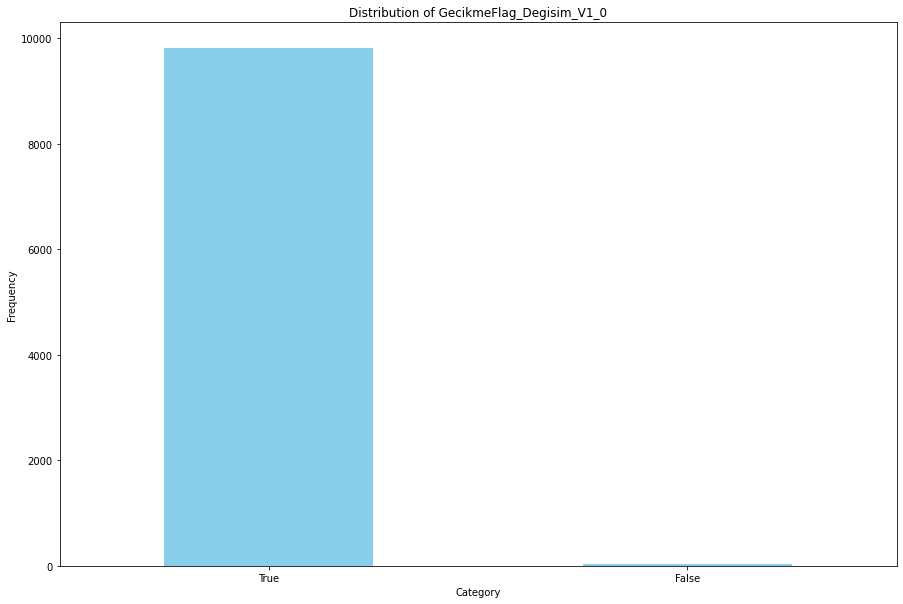

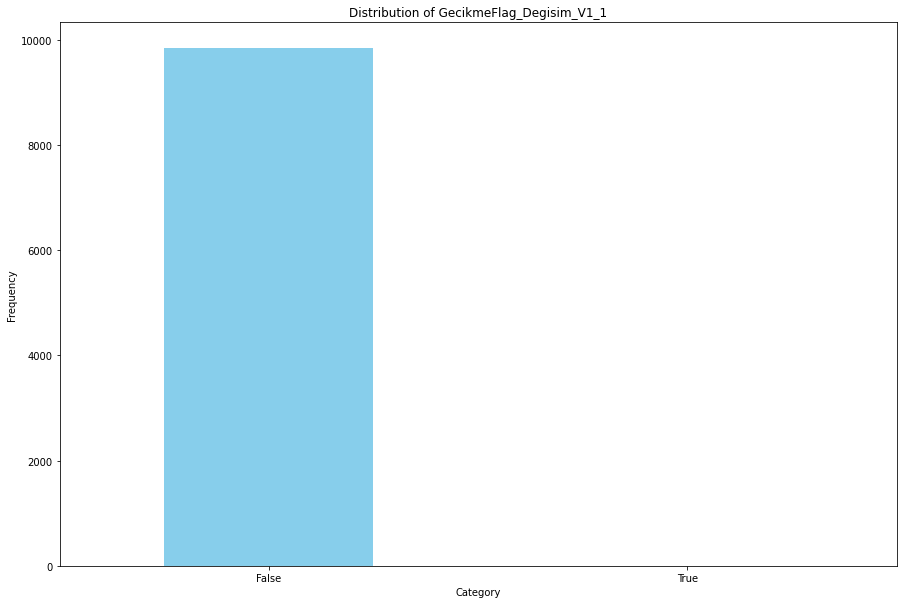

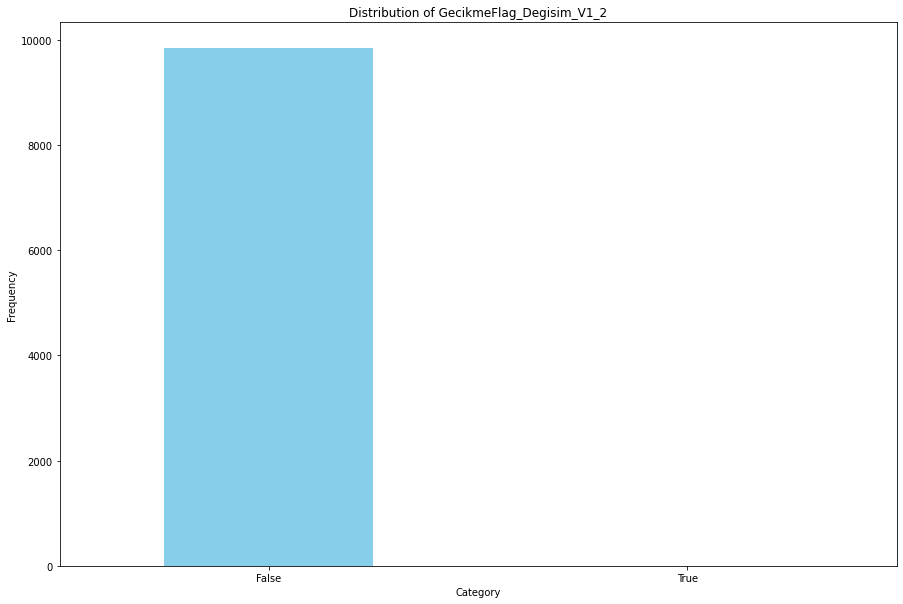

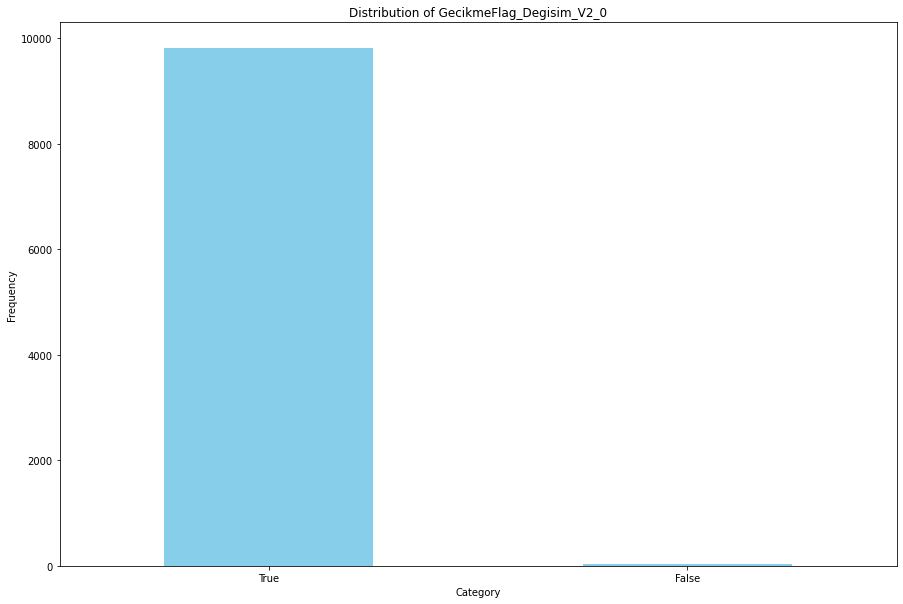

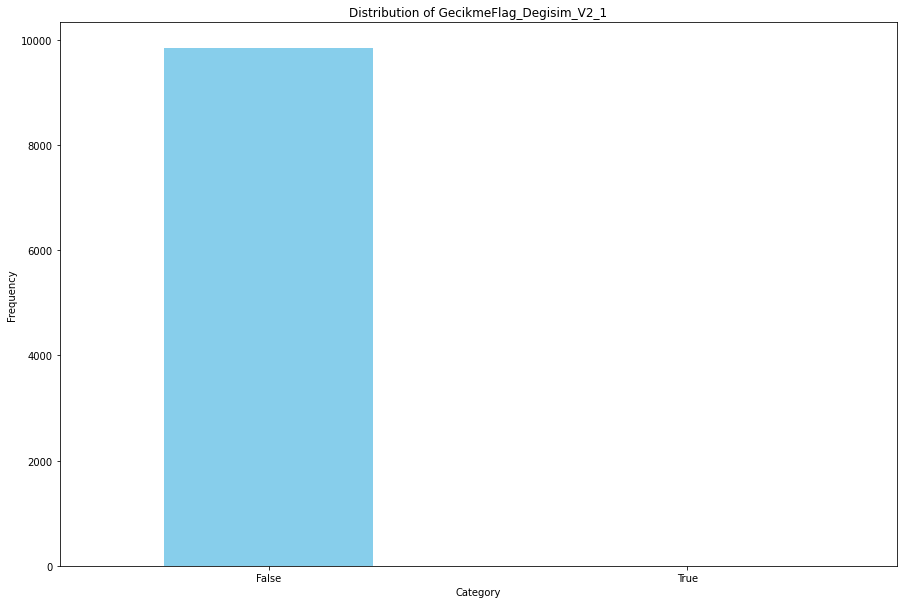

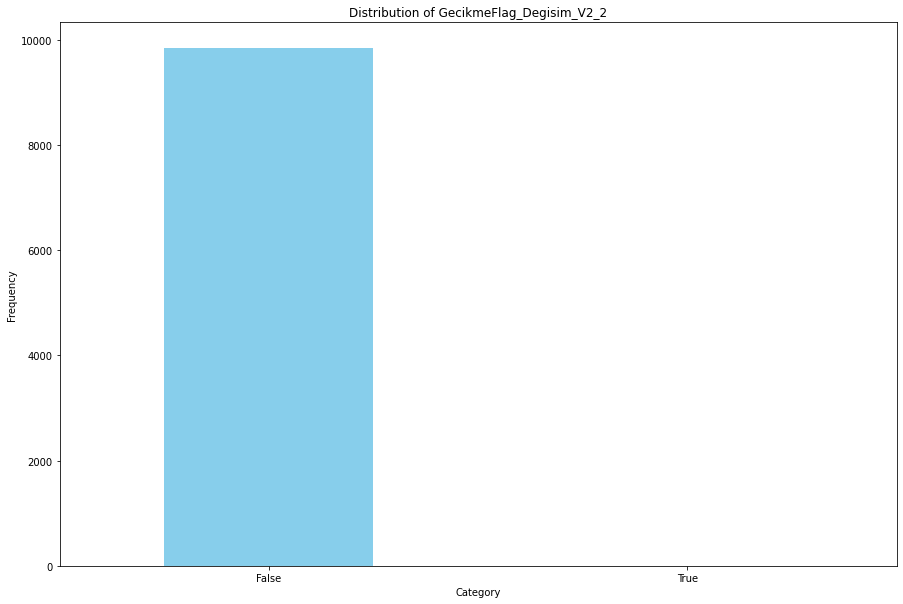

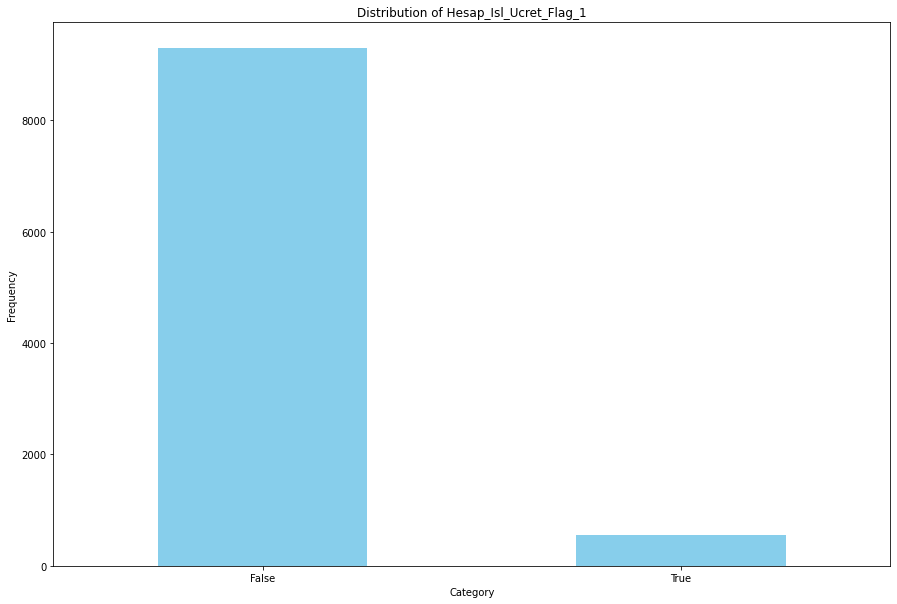

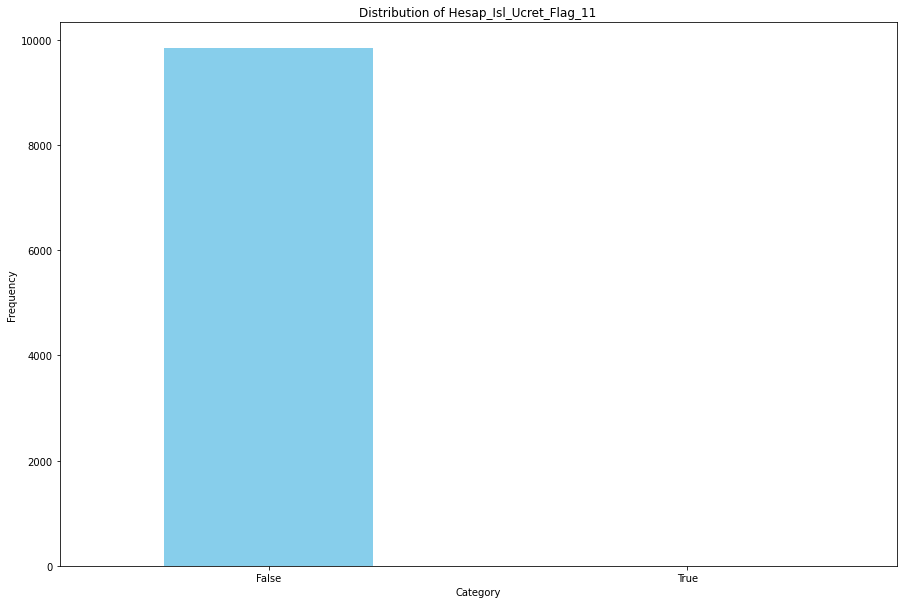

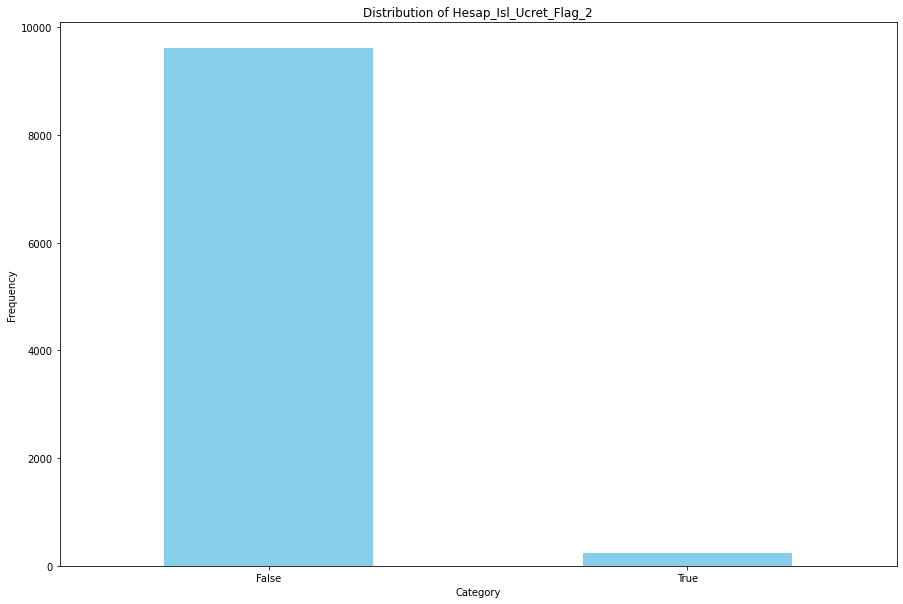

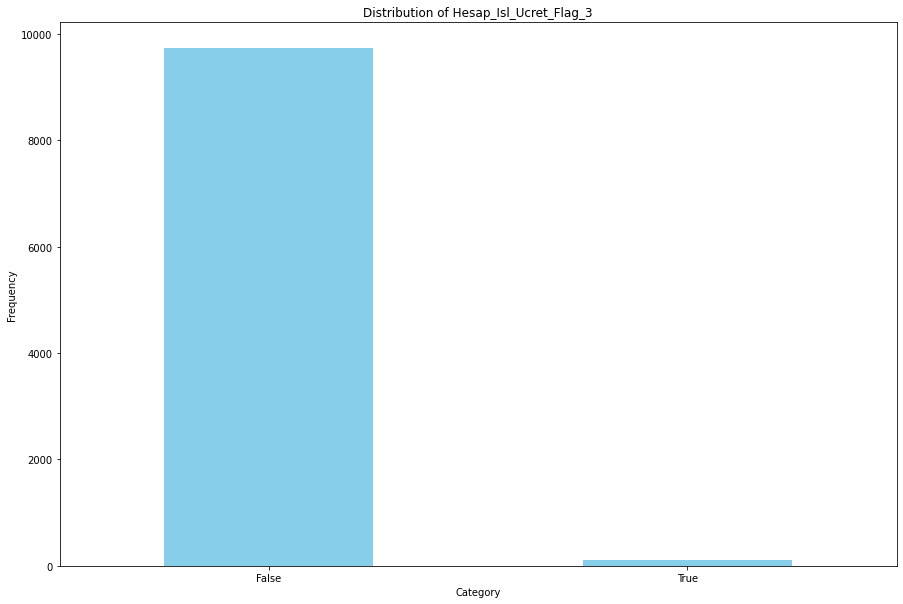

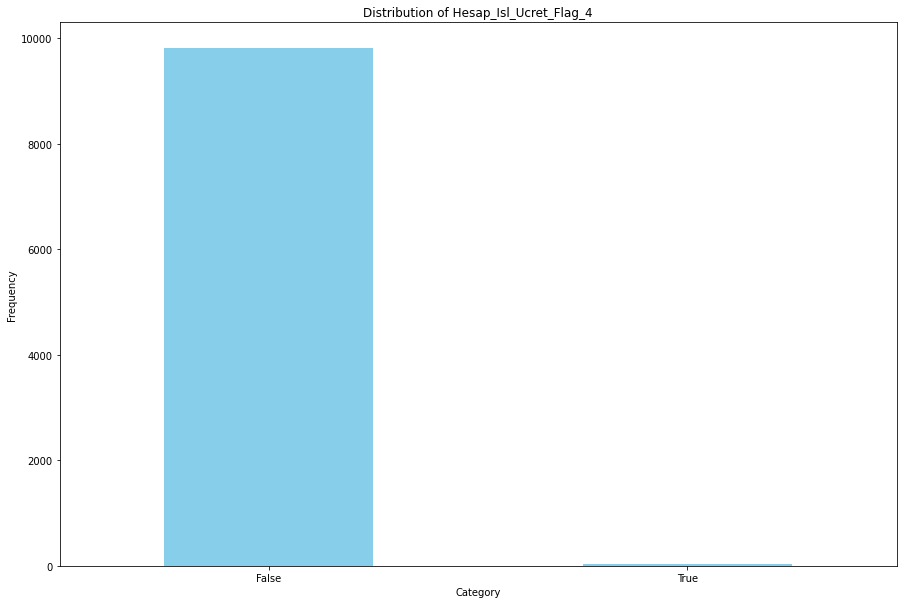

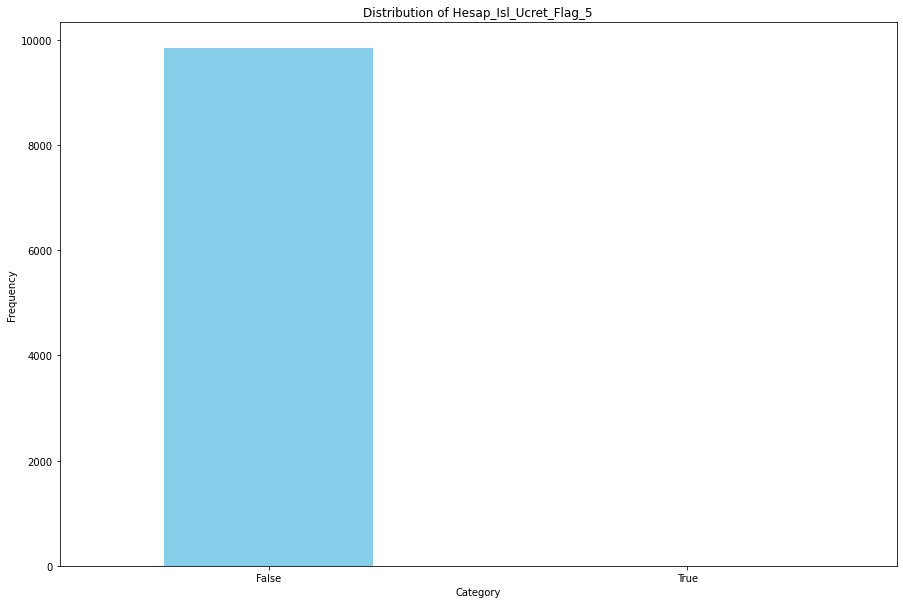

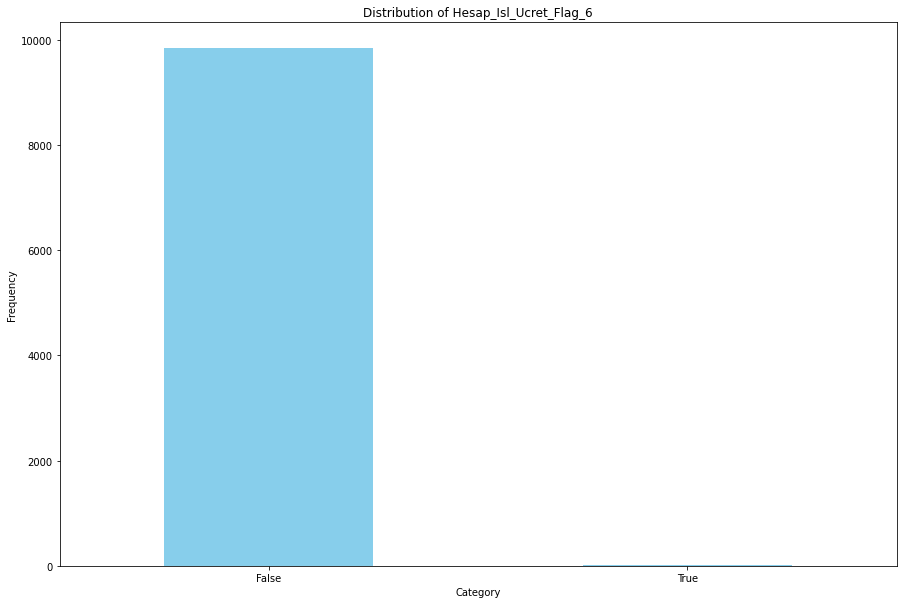

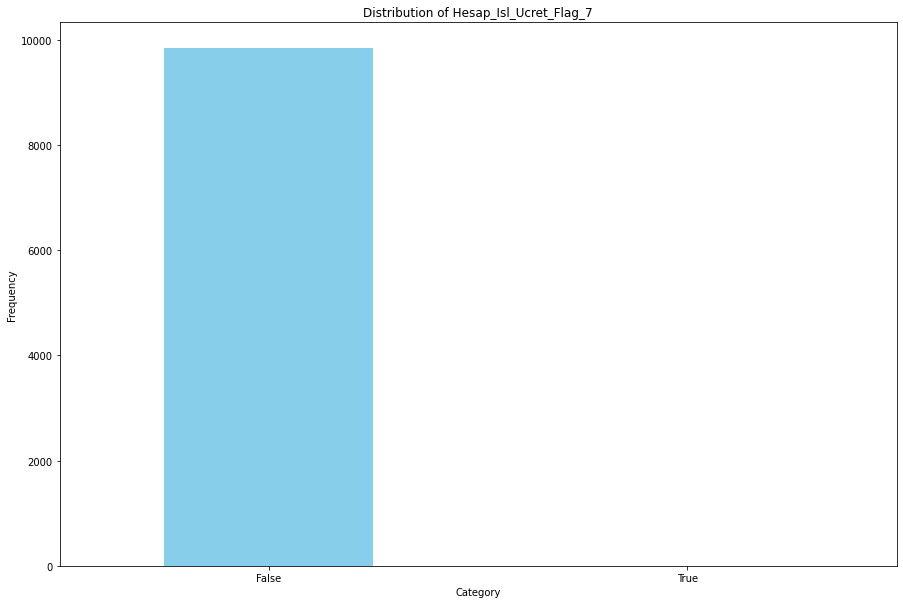

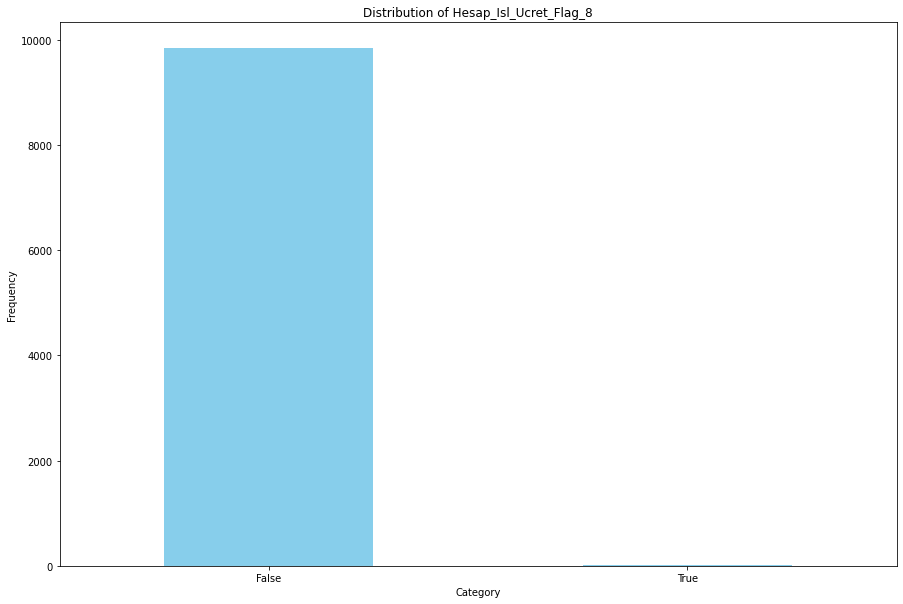

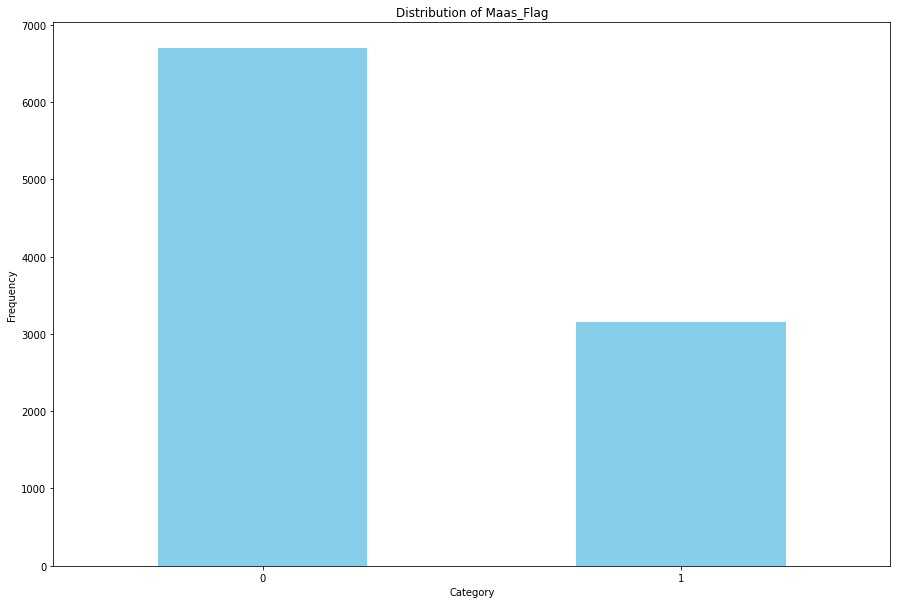

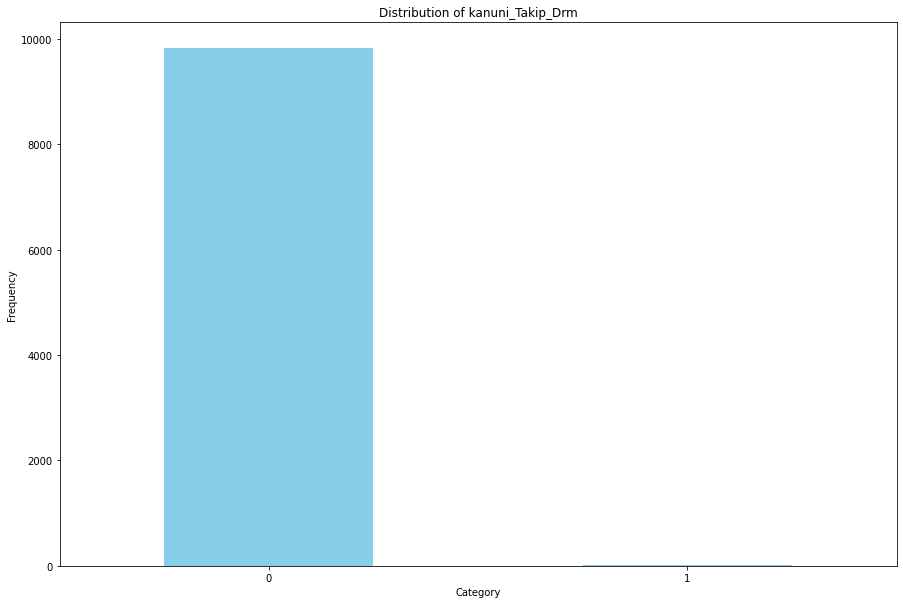

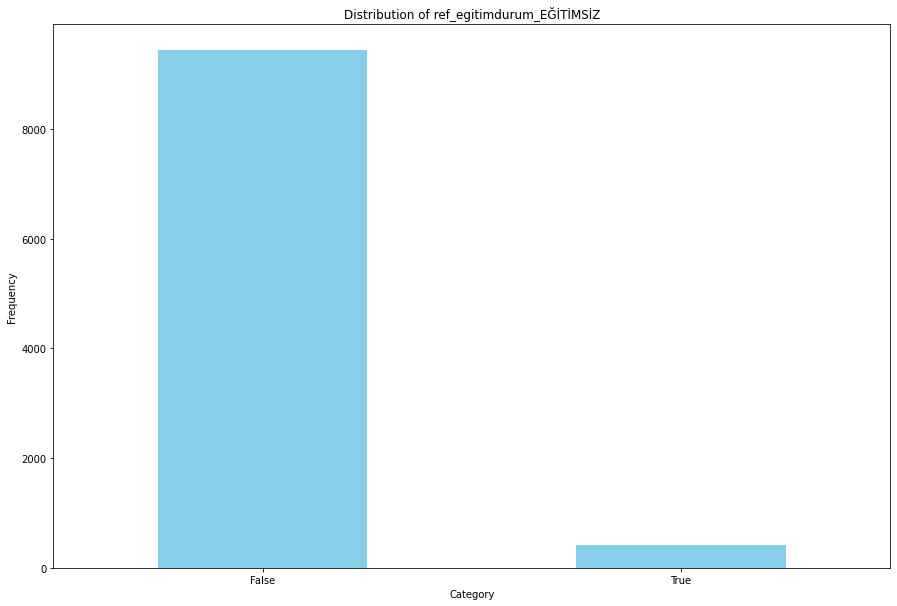

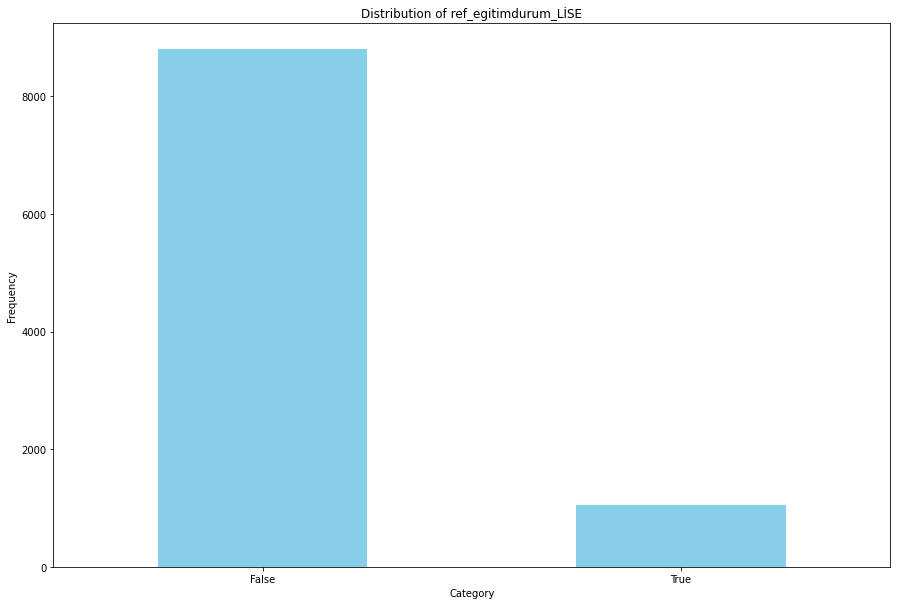

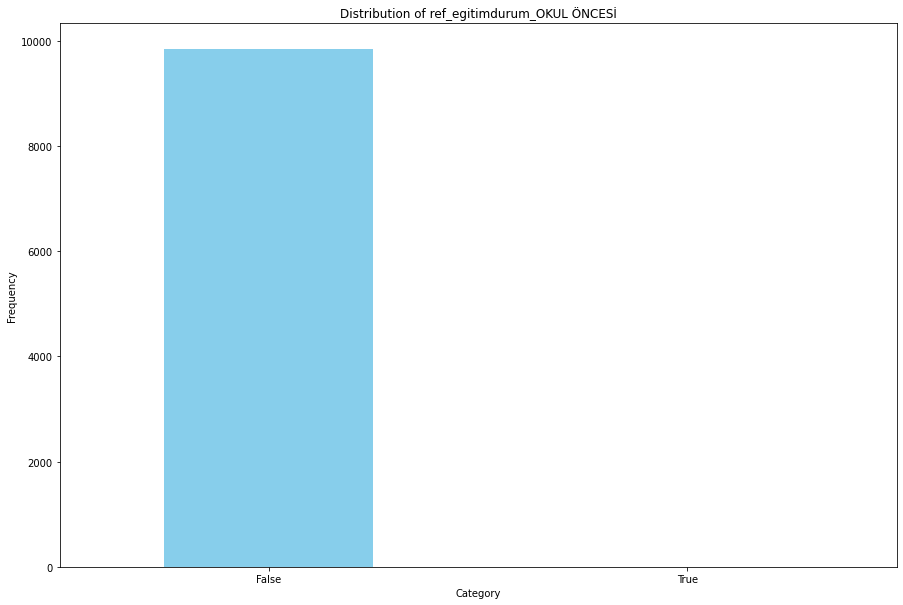

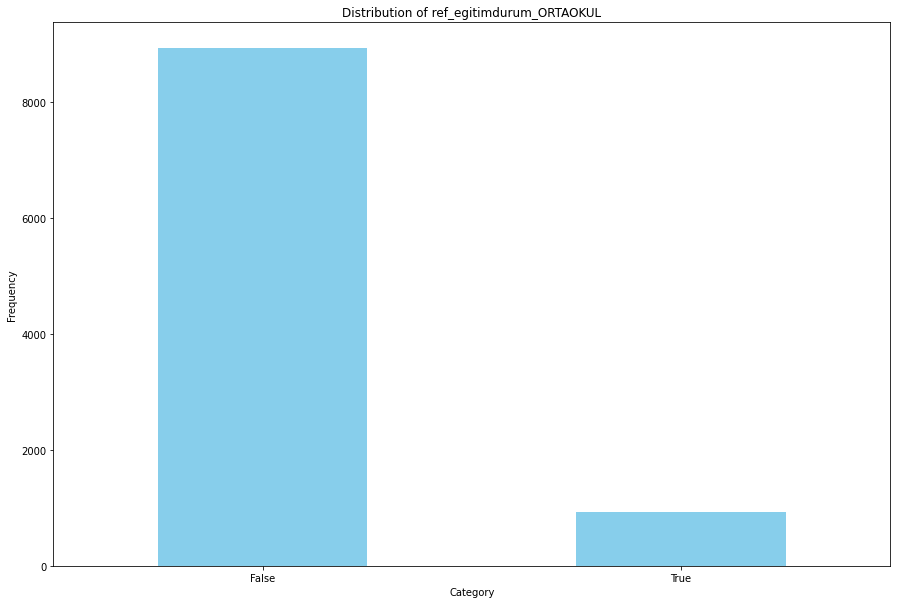

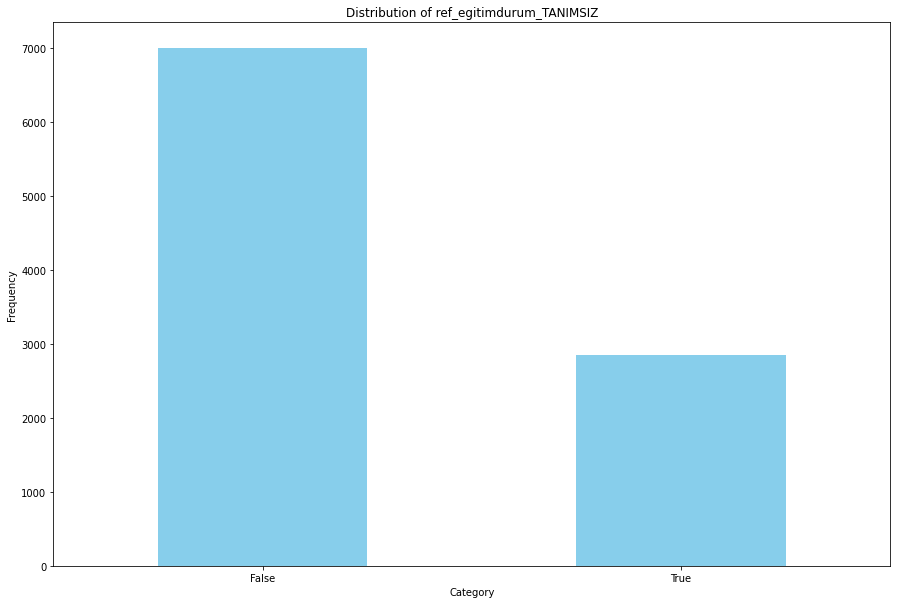

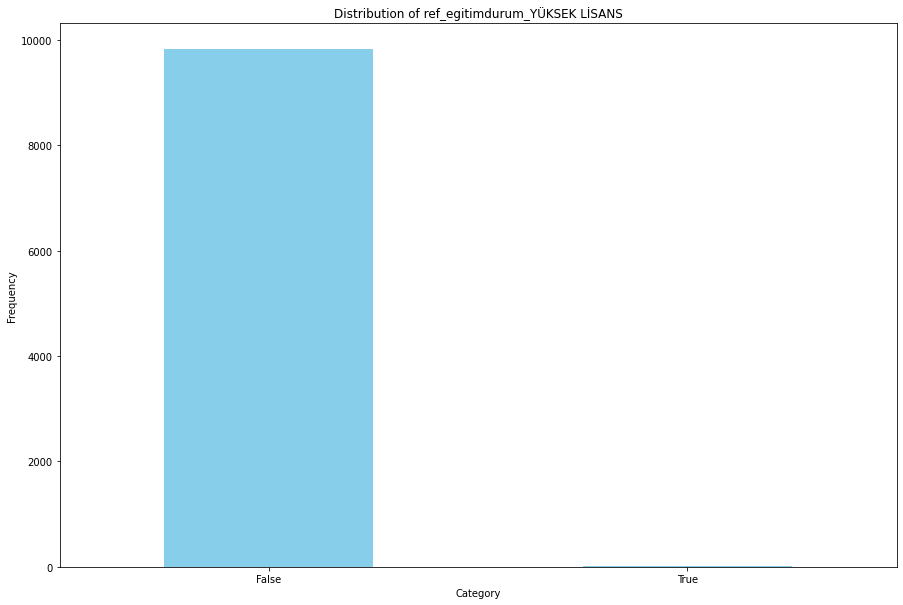

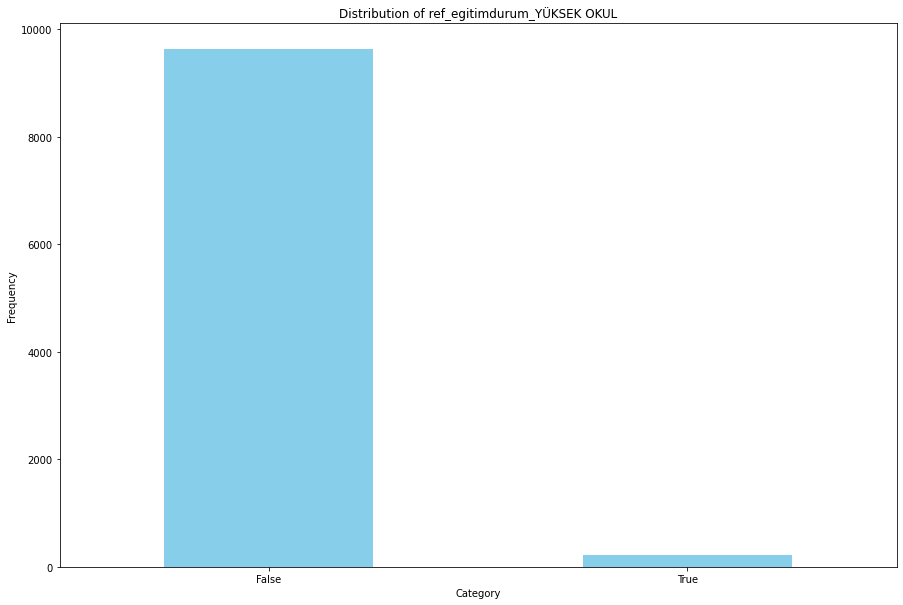

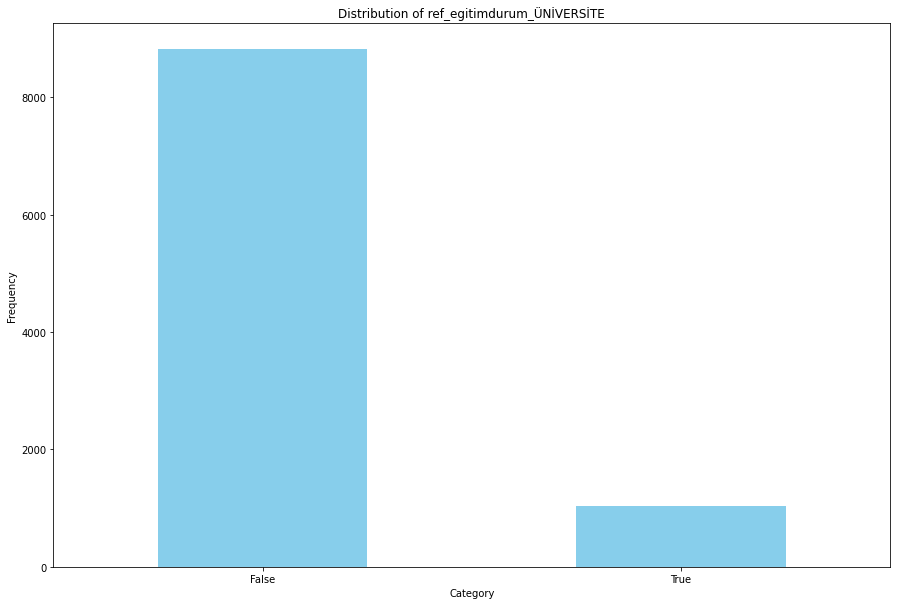

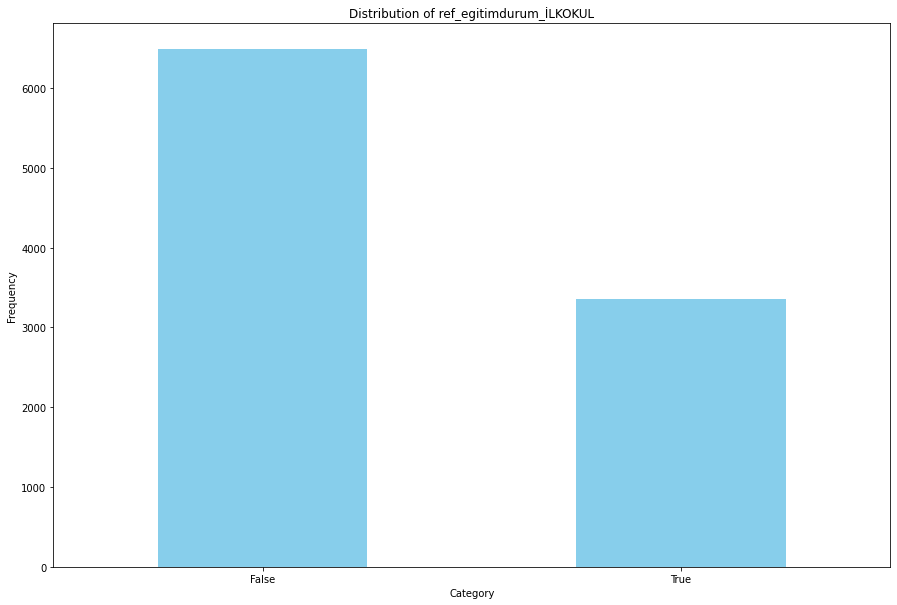

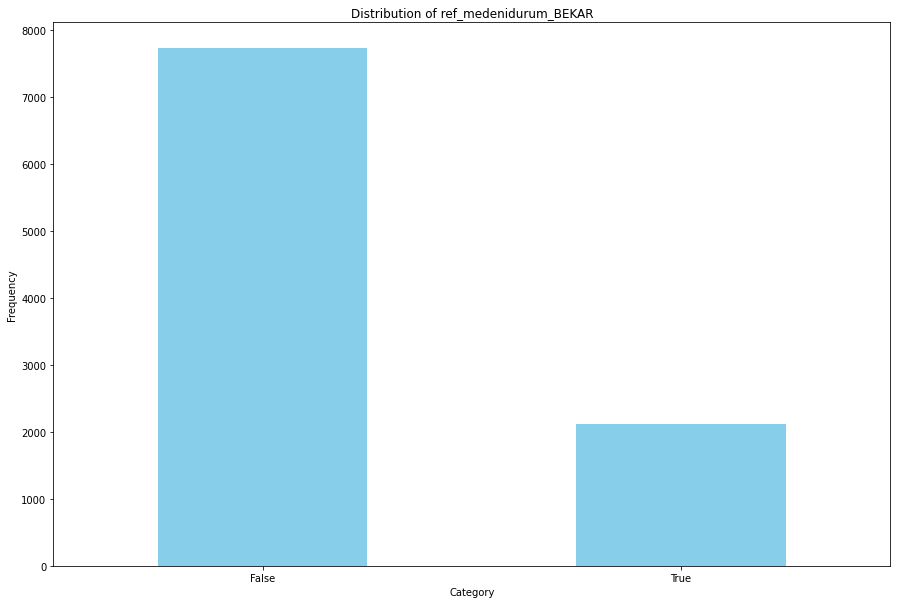

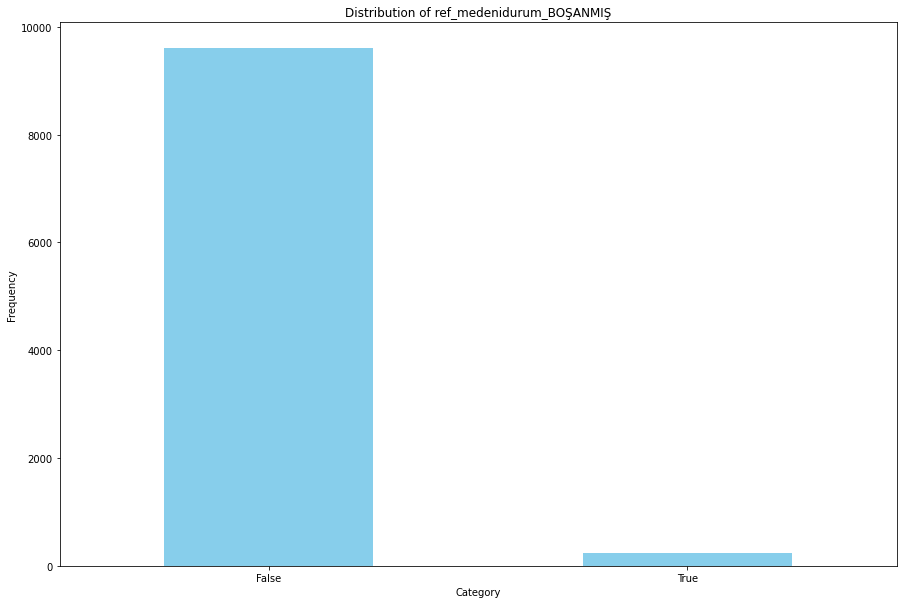

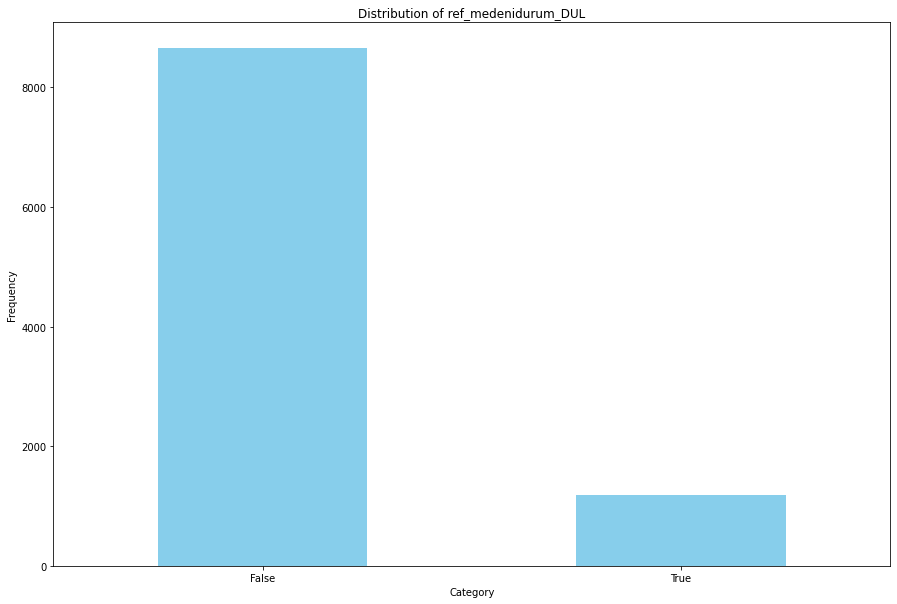

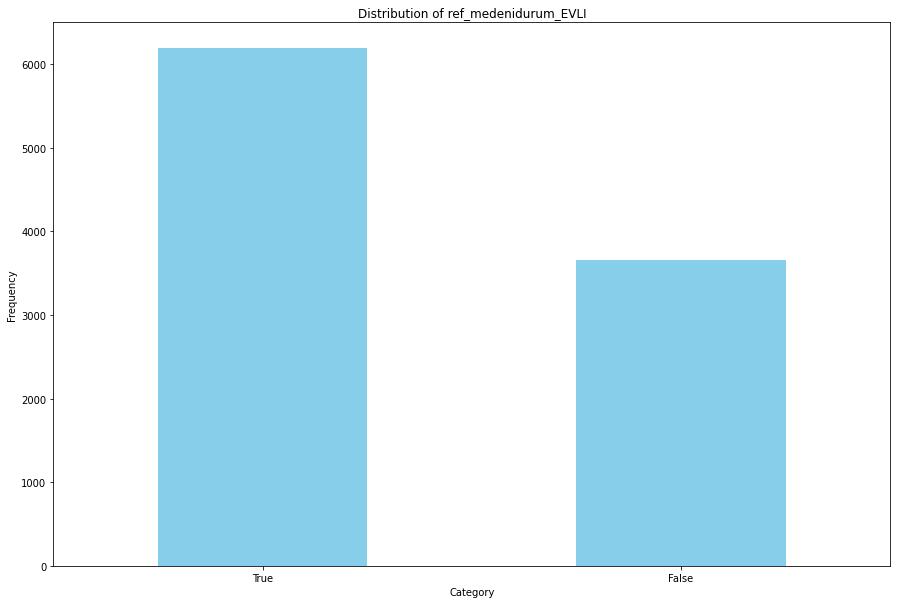

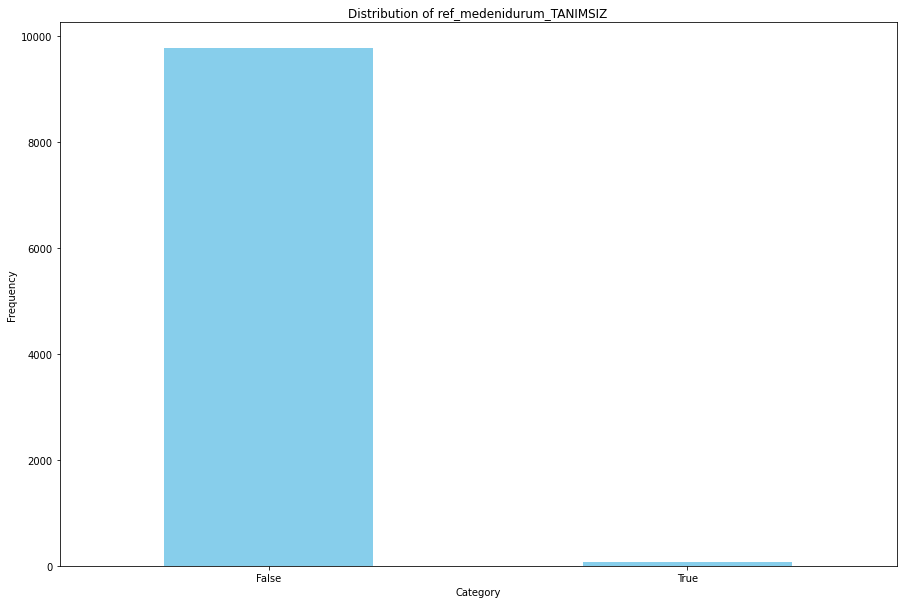

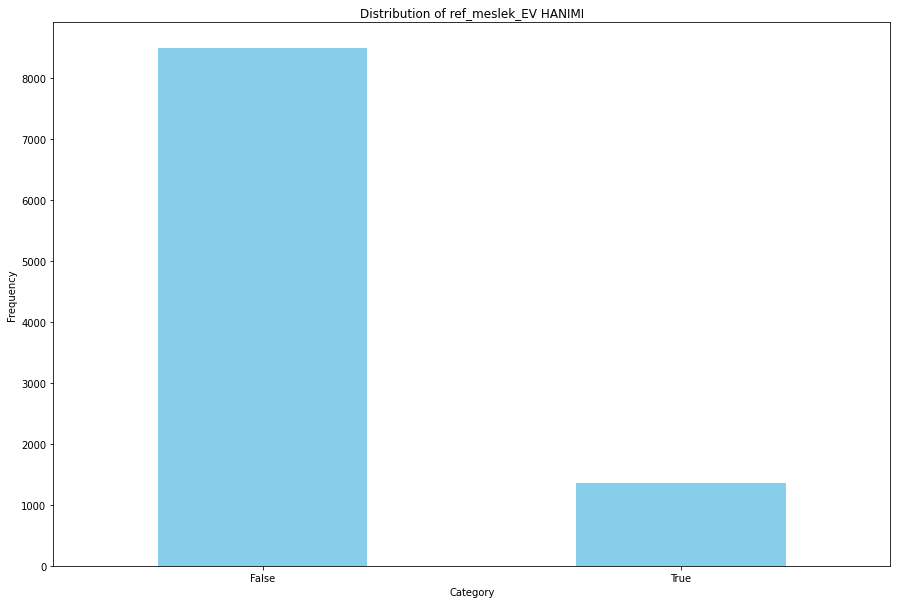

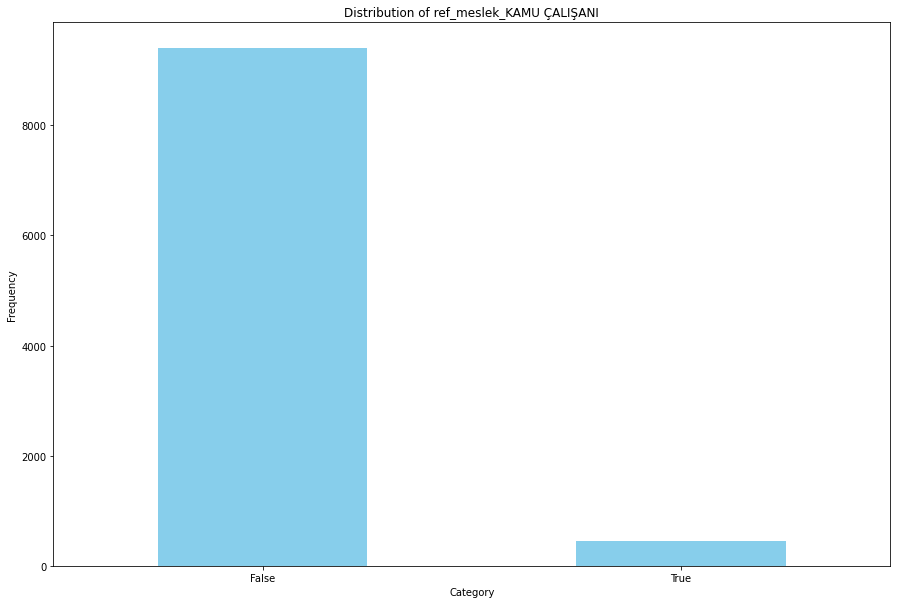

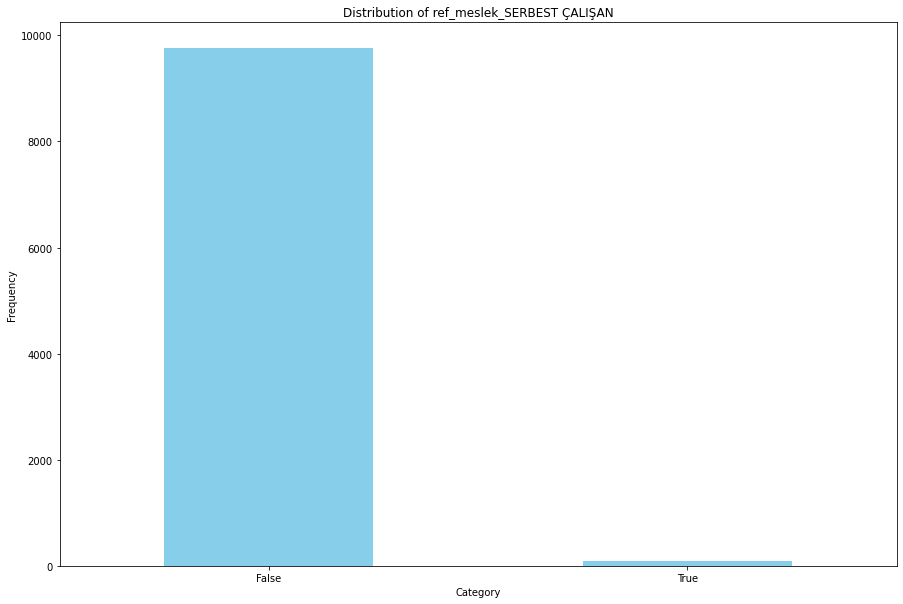

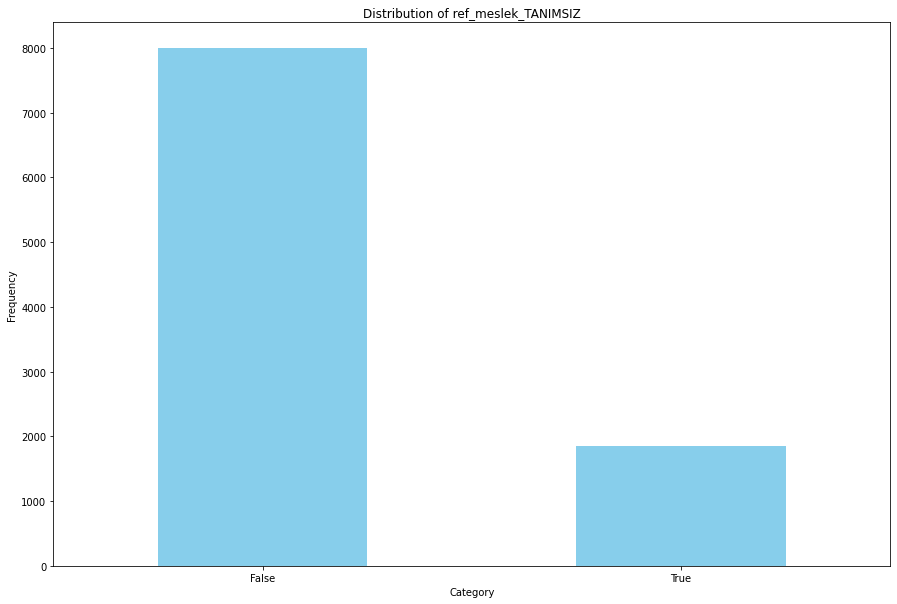

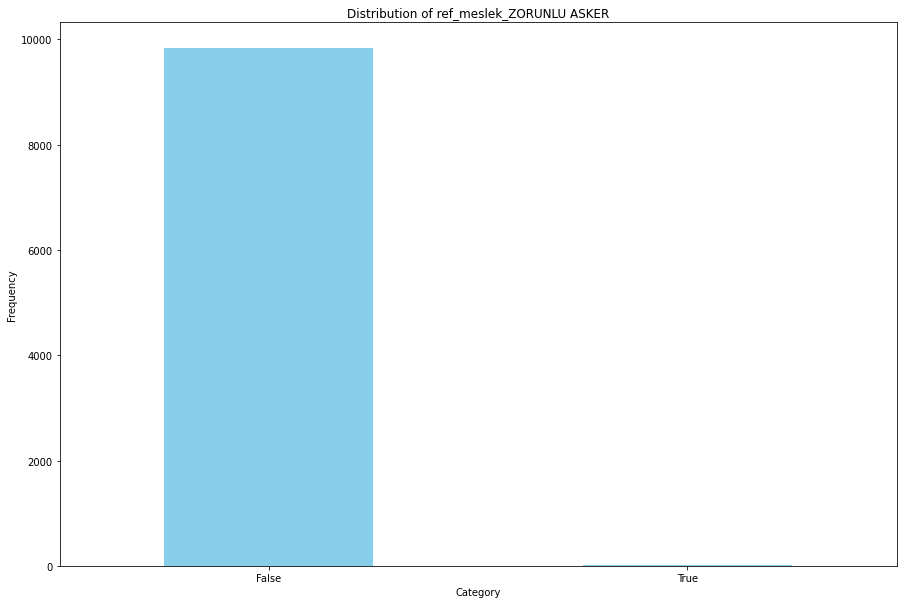

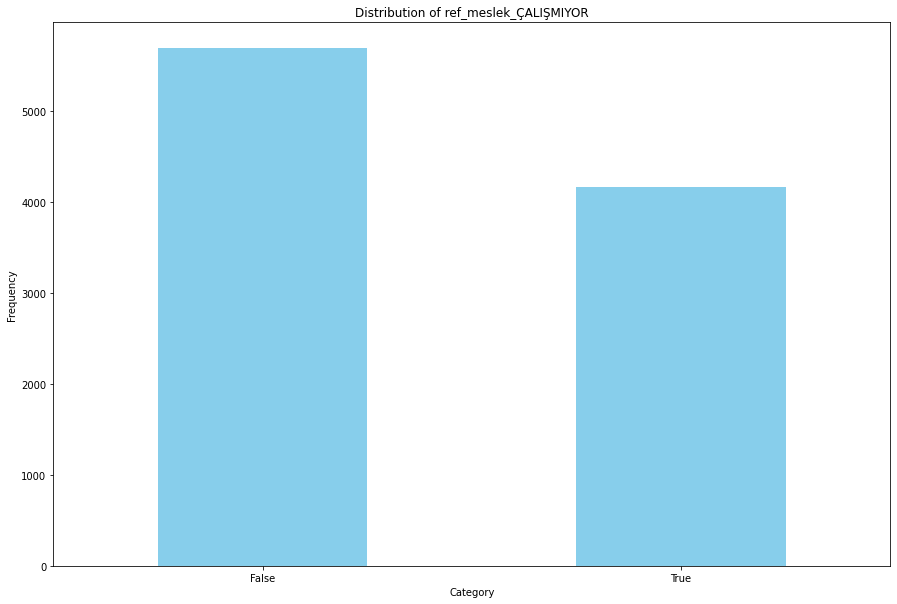

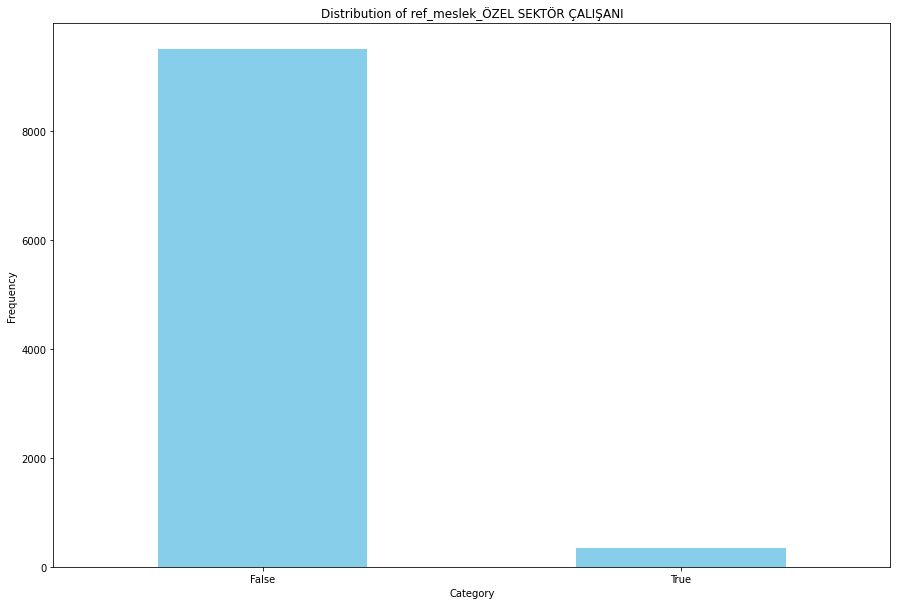

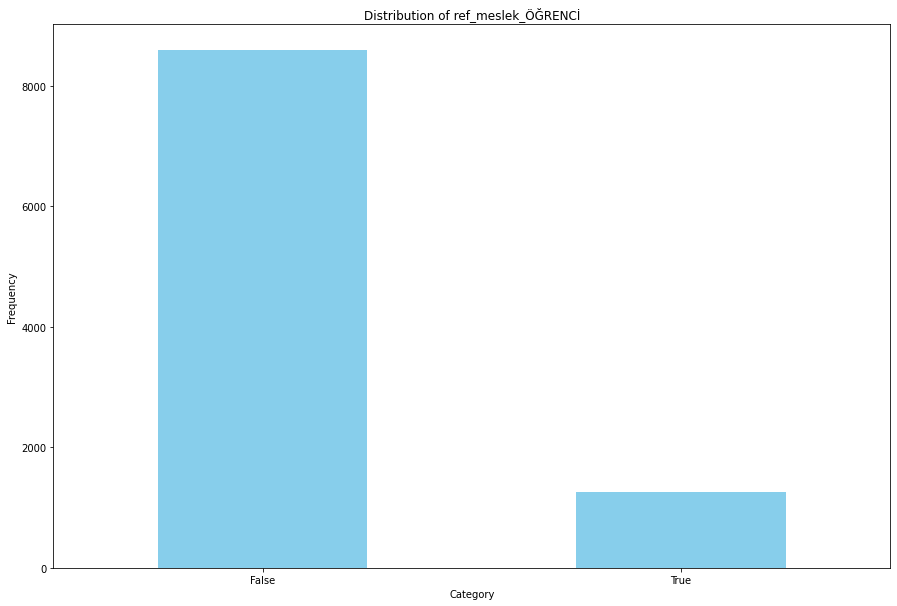

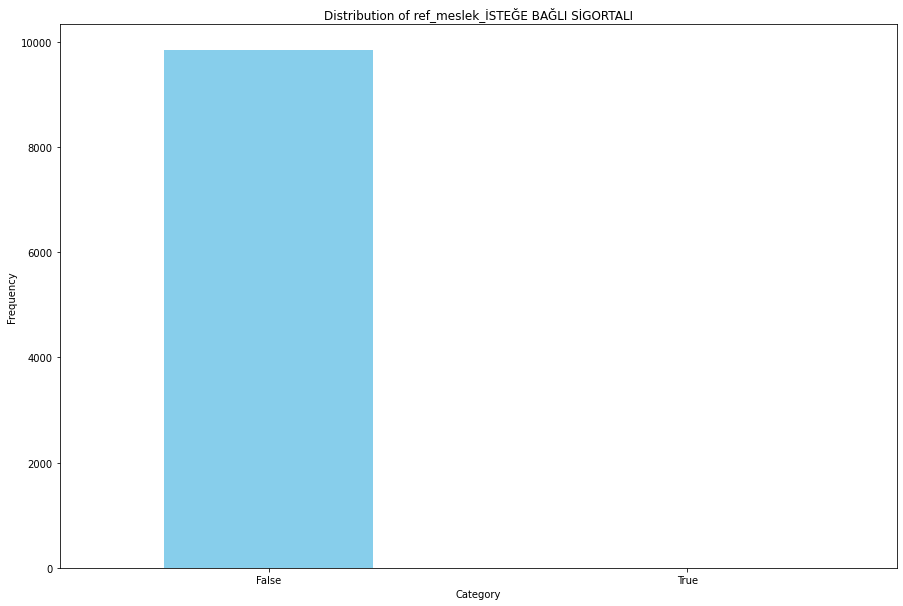

In [25]:
# Plot bar plots for each boolean column

bool_cols = (data.select_dtypes(include=['bool']) + data[['Maas_Flag','kanuni_Takip_Drm', \
                                                                'CHRN_MUST_YAKIN_IZLEME_ACIK_FLAG']]).columns


for col in bool_cols:
    data[col].value_counts().plot(kind='bar', figsize=(15, 10), color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.show()

**Histogram Plots**

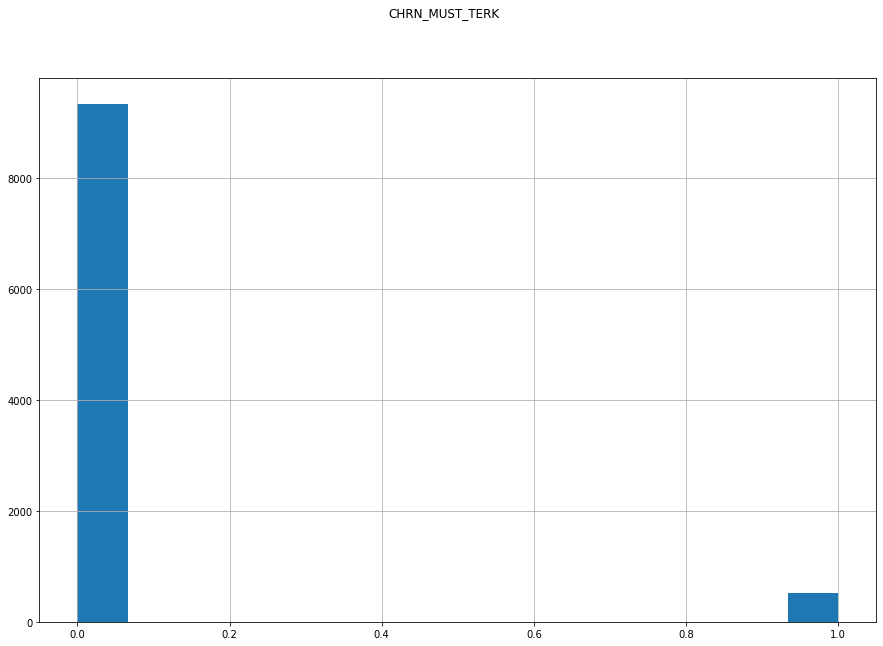

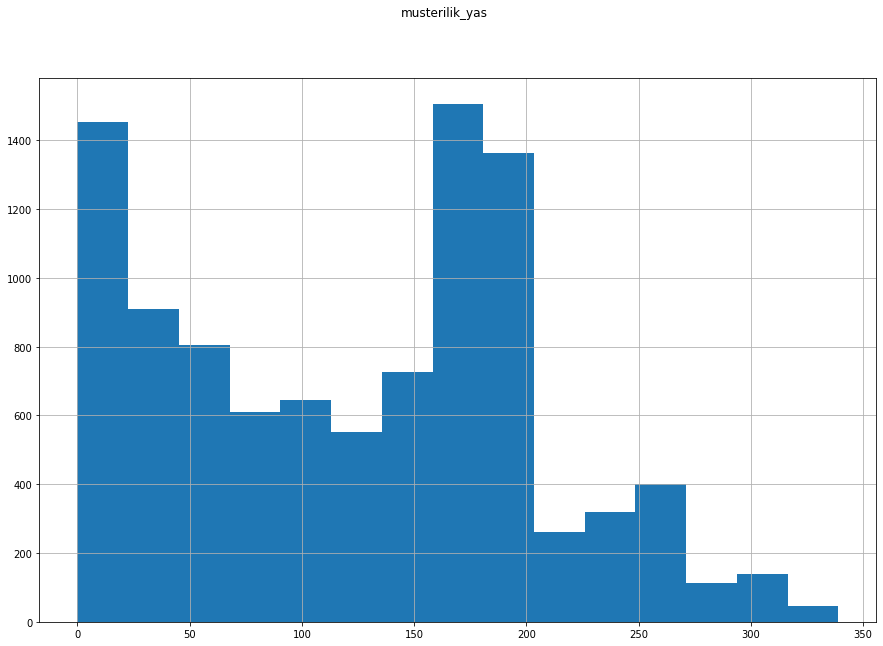

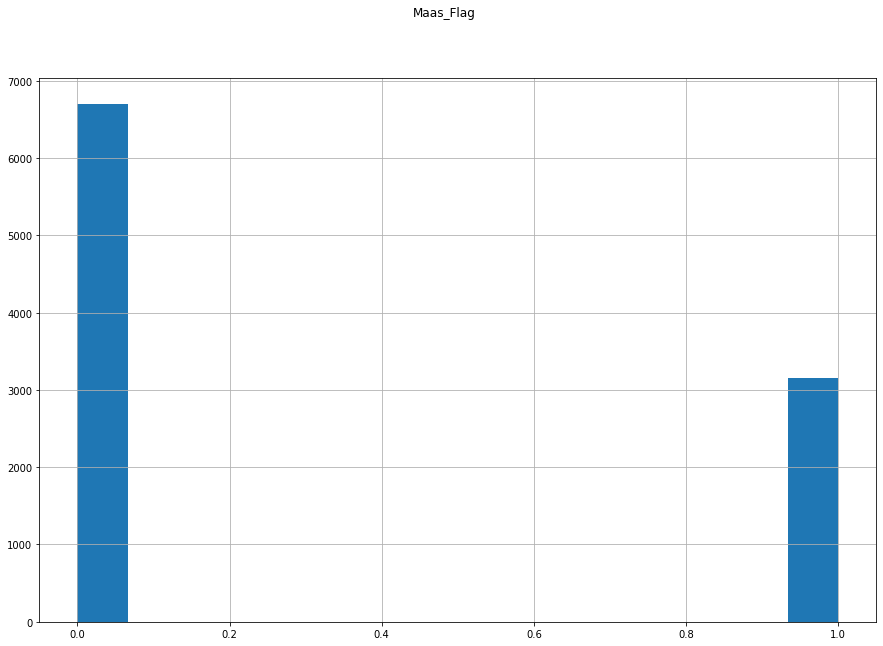

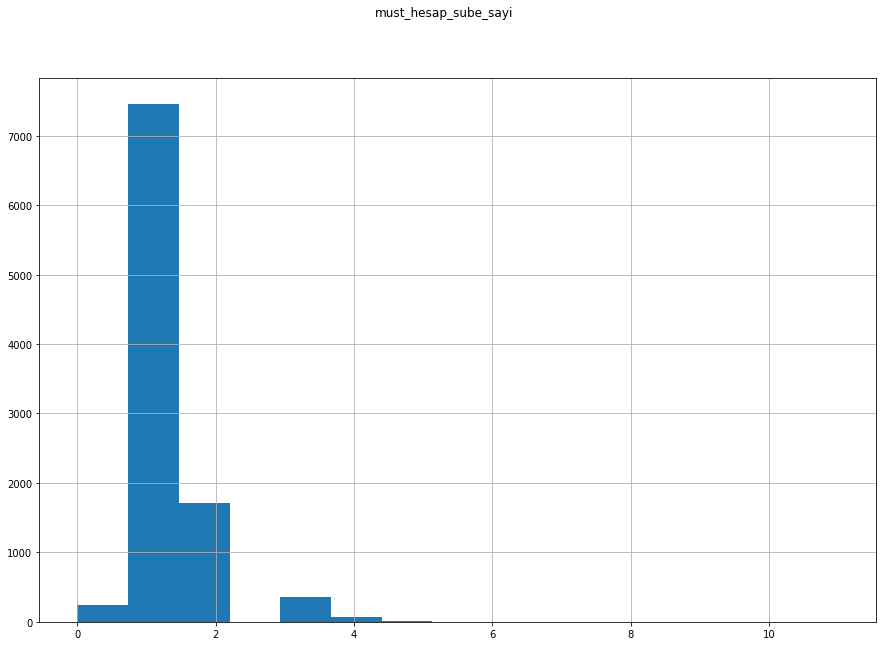

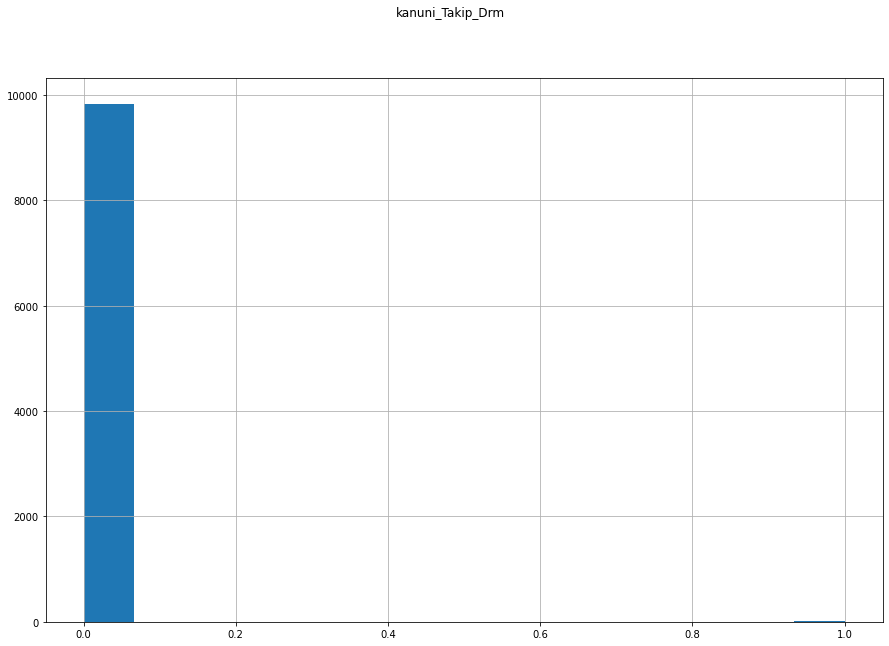

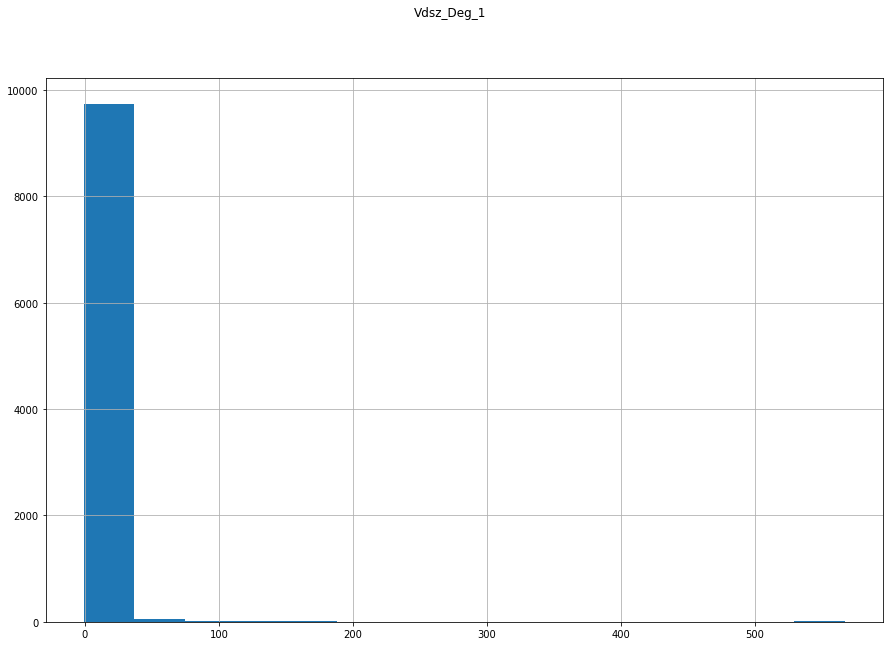

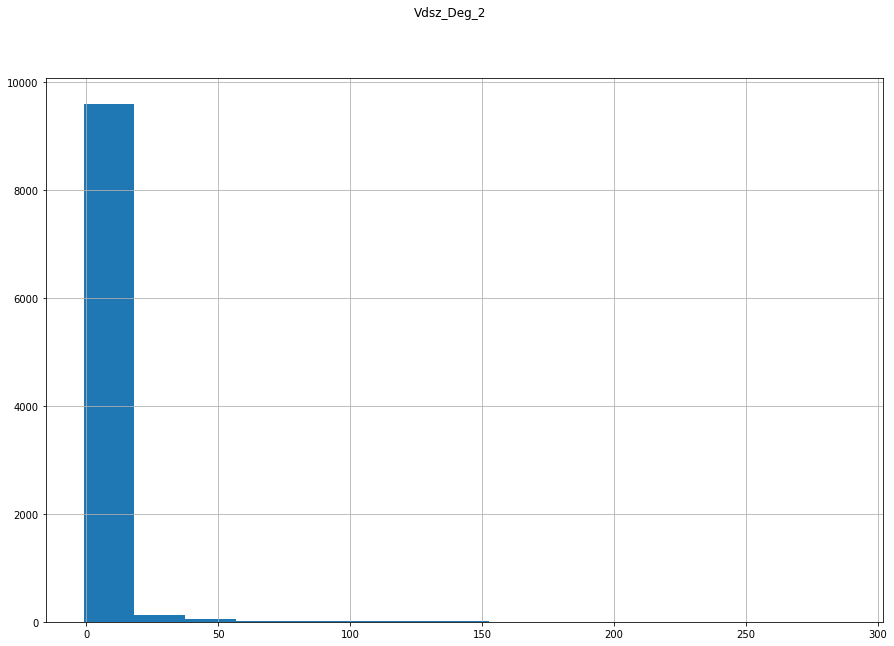

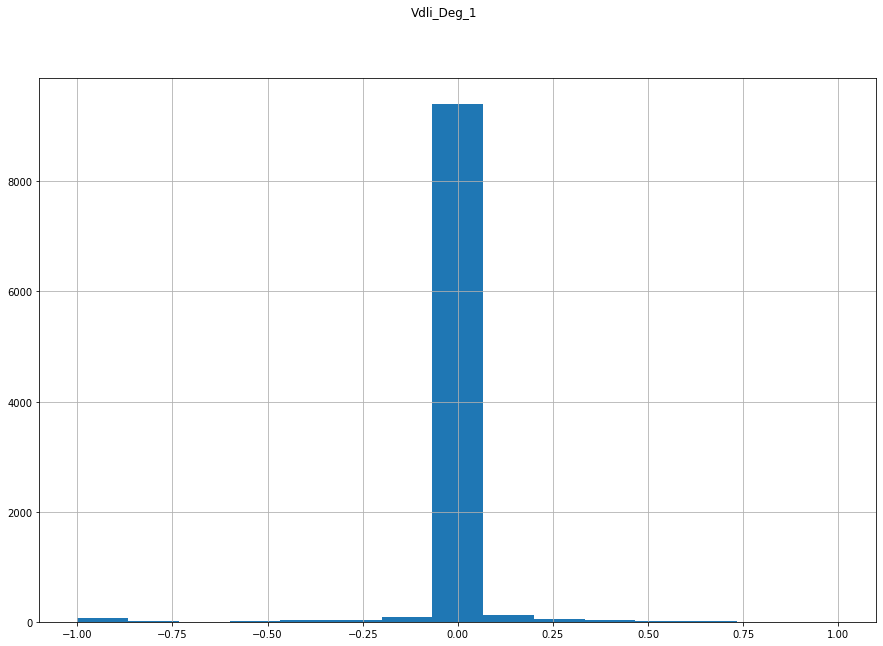

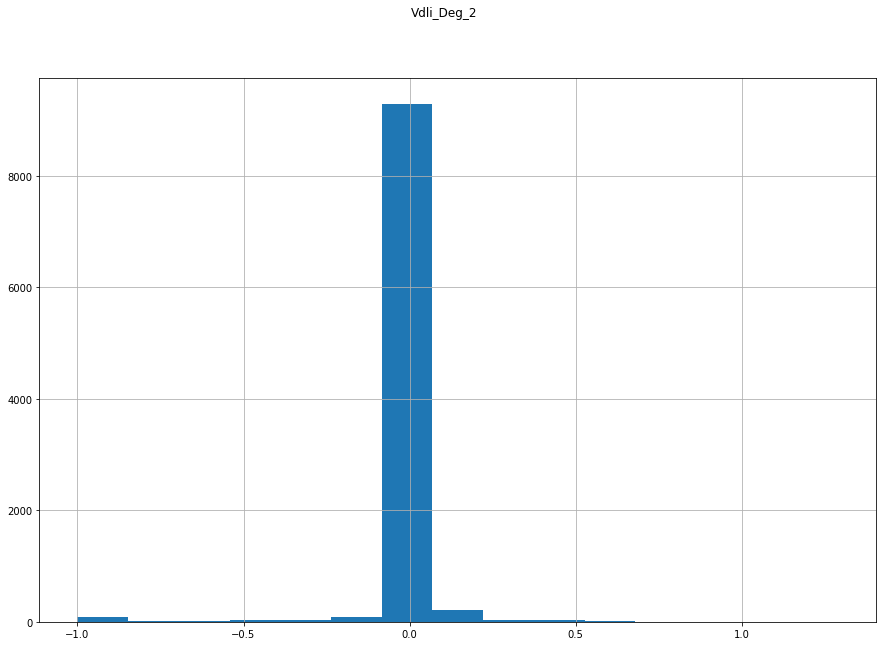

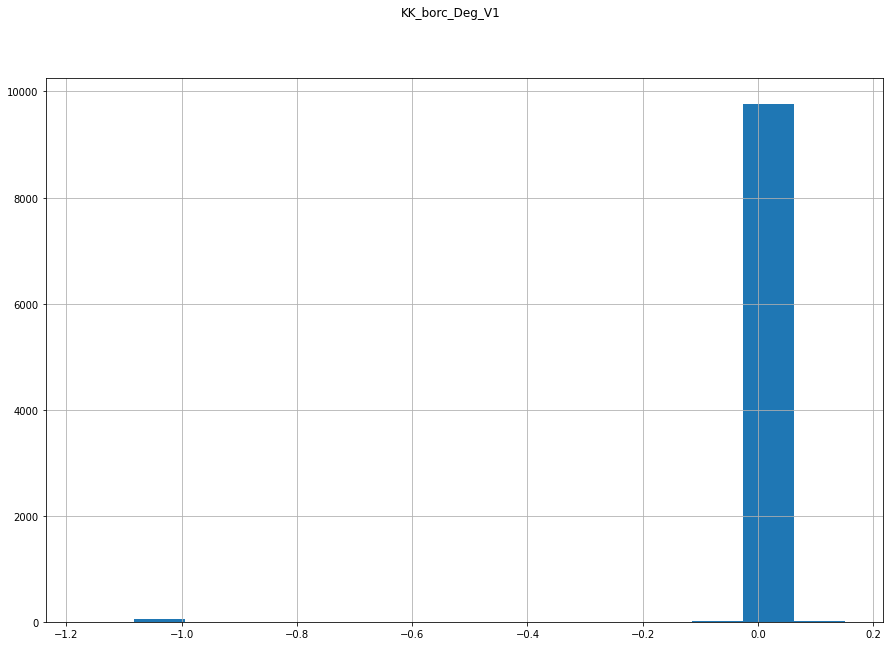

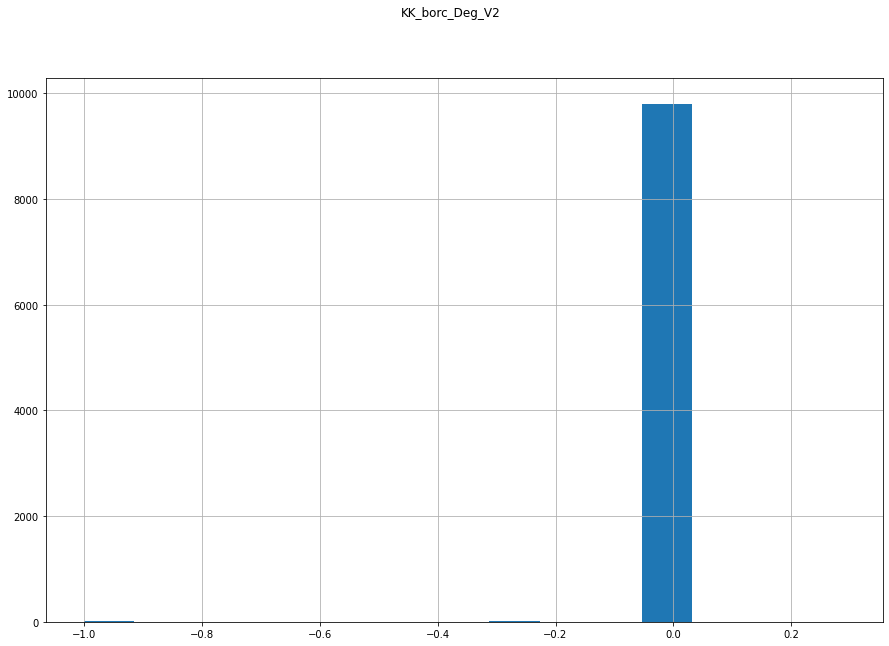

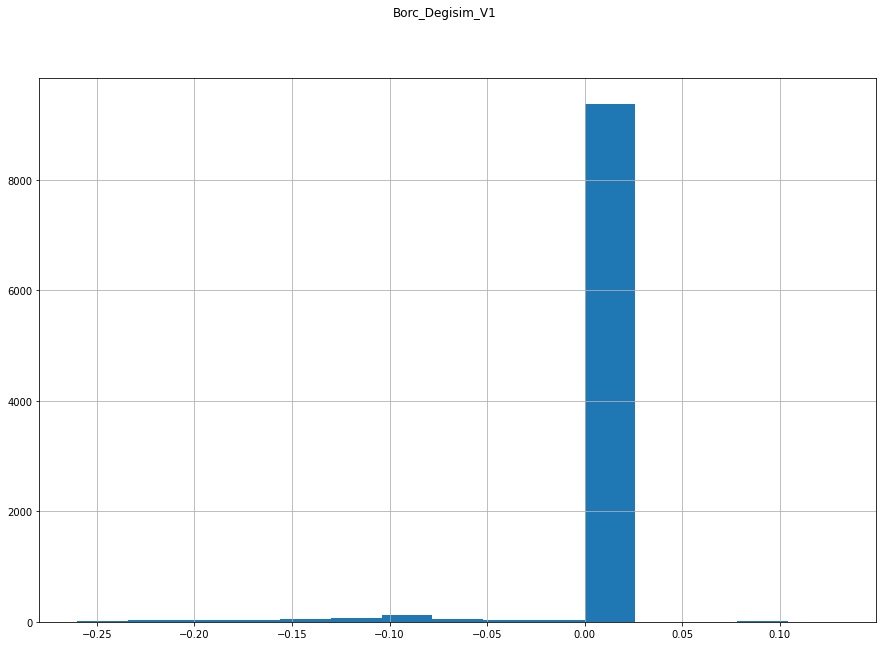

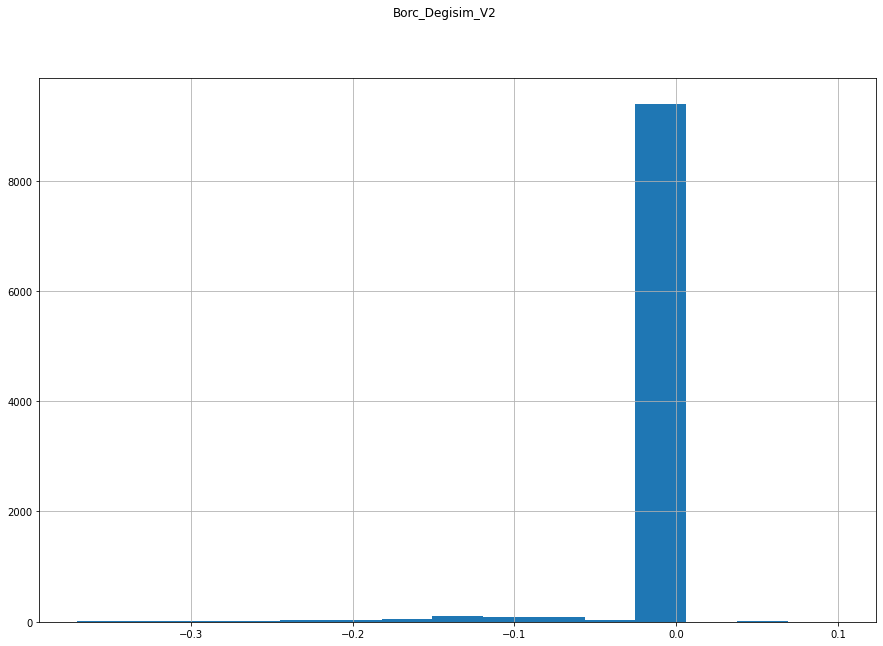

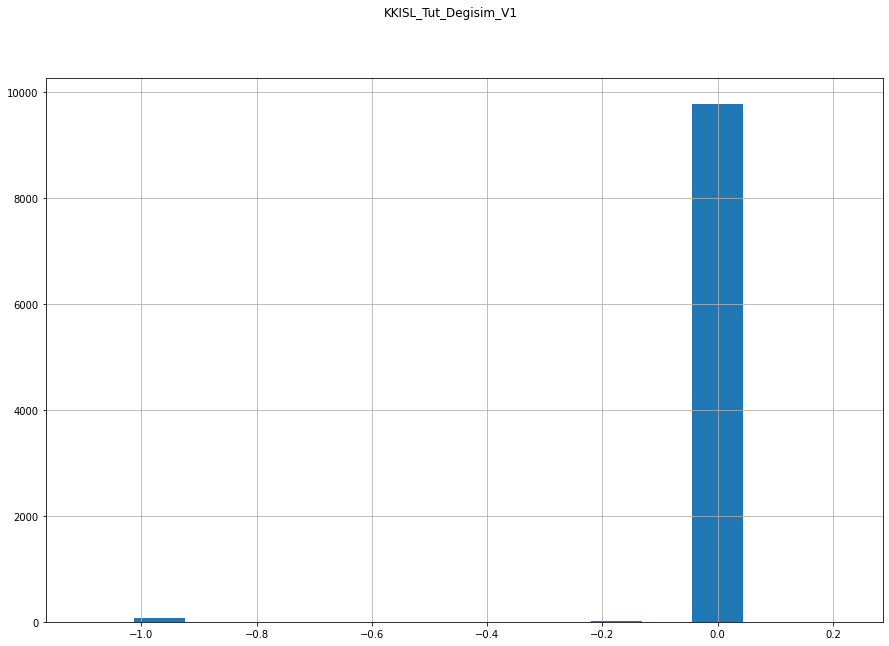

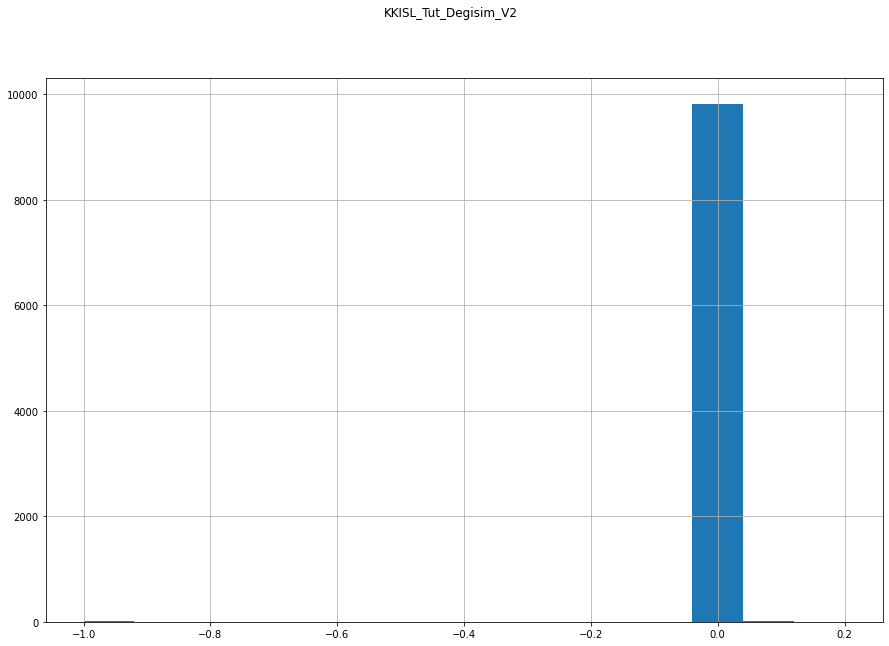

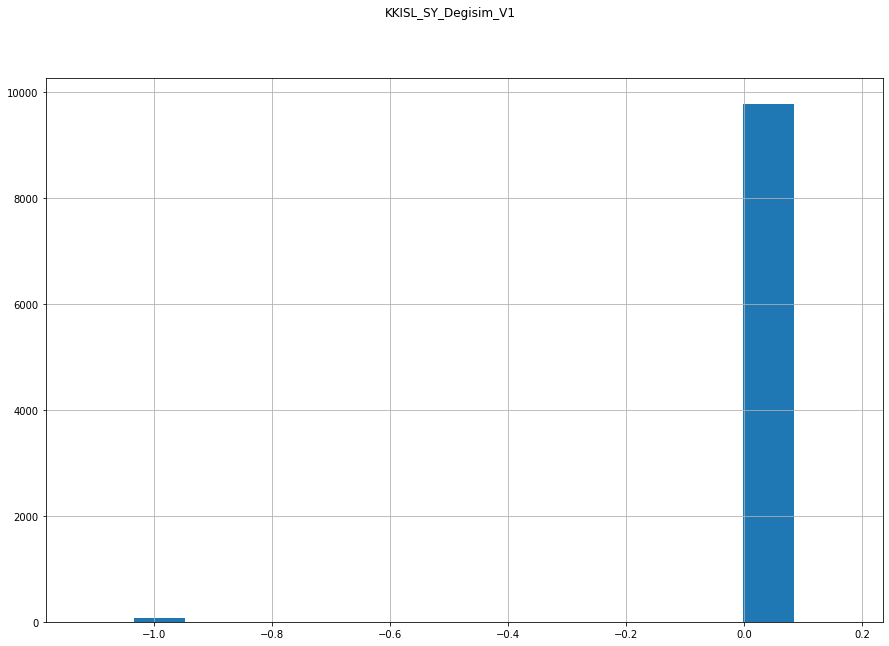

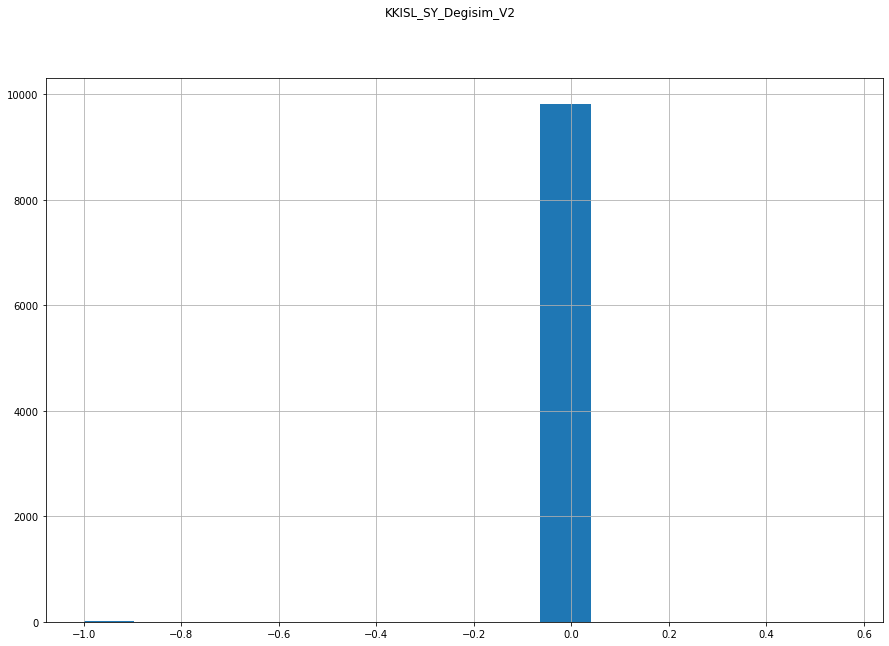

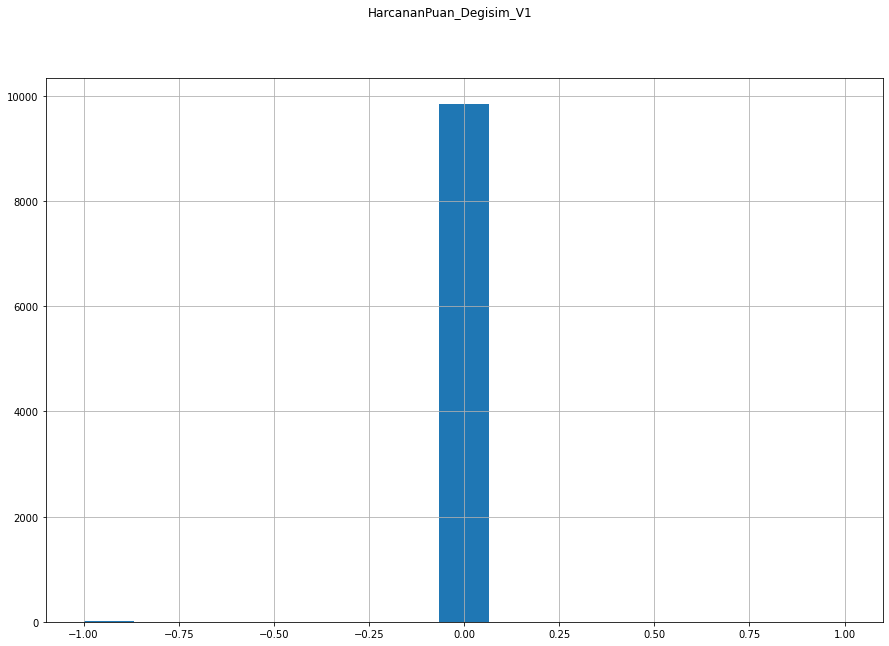

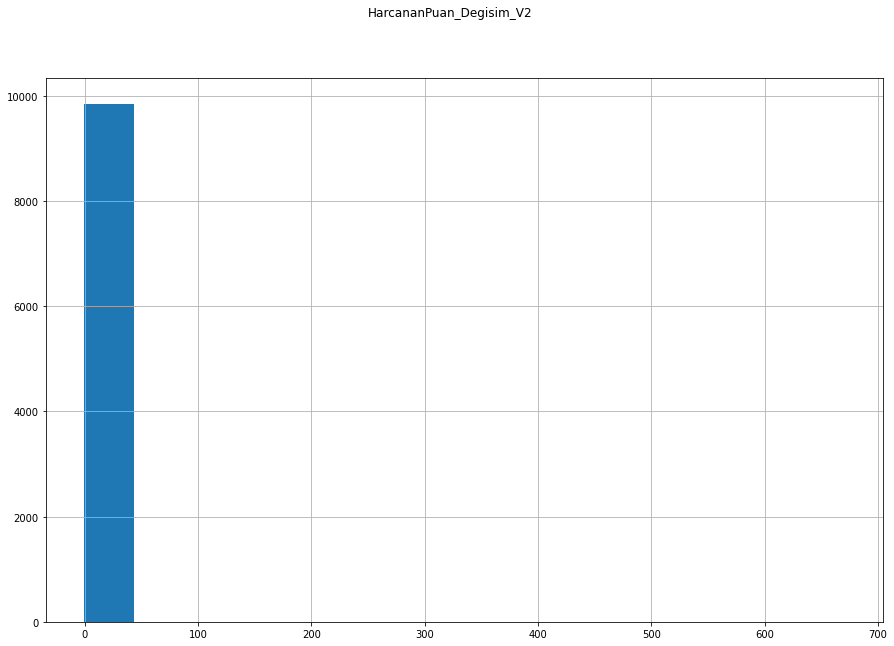

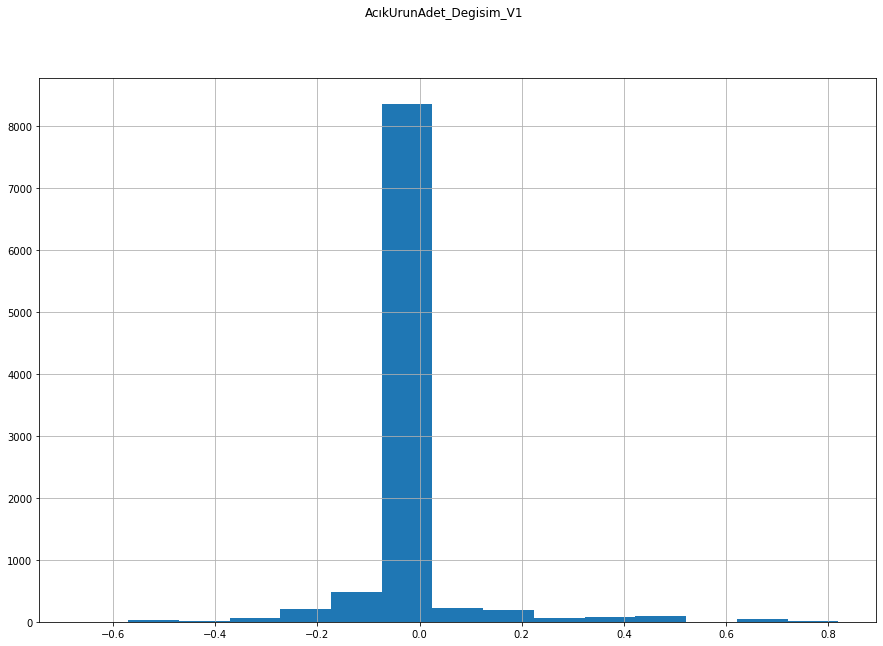

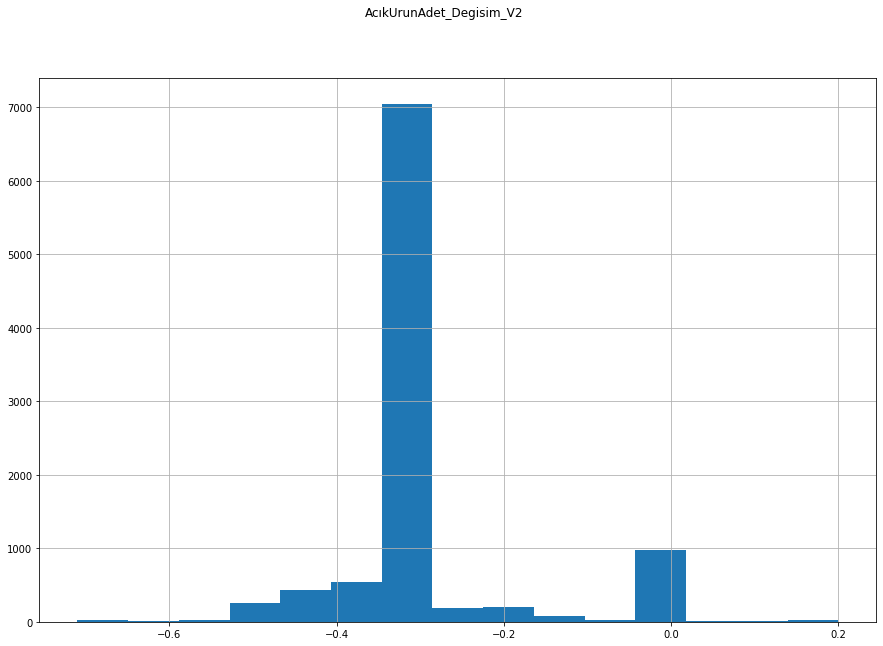

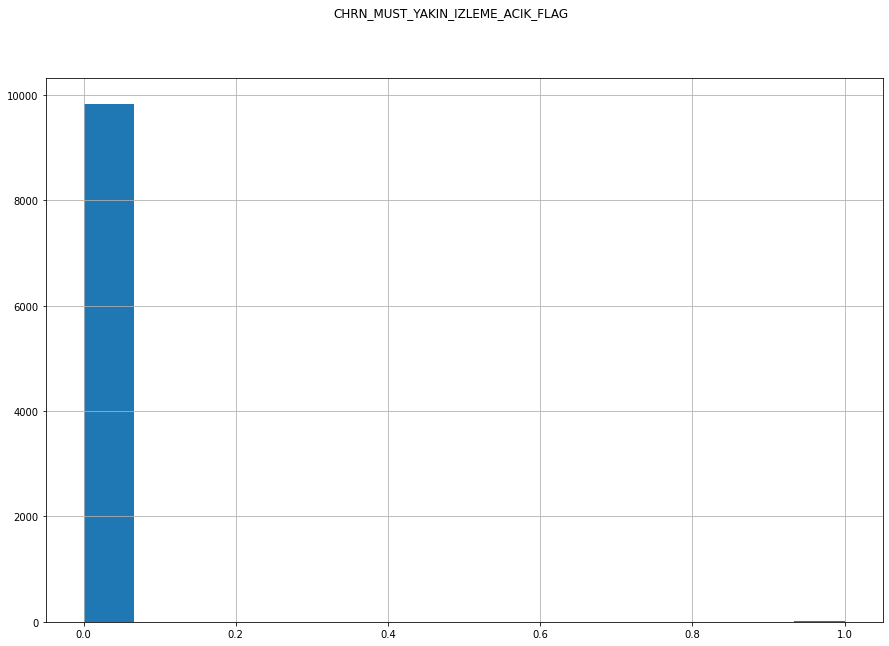

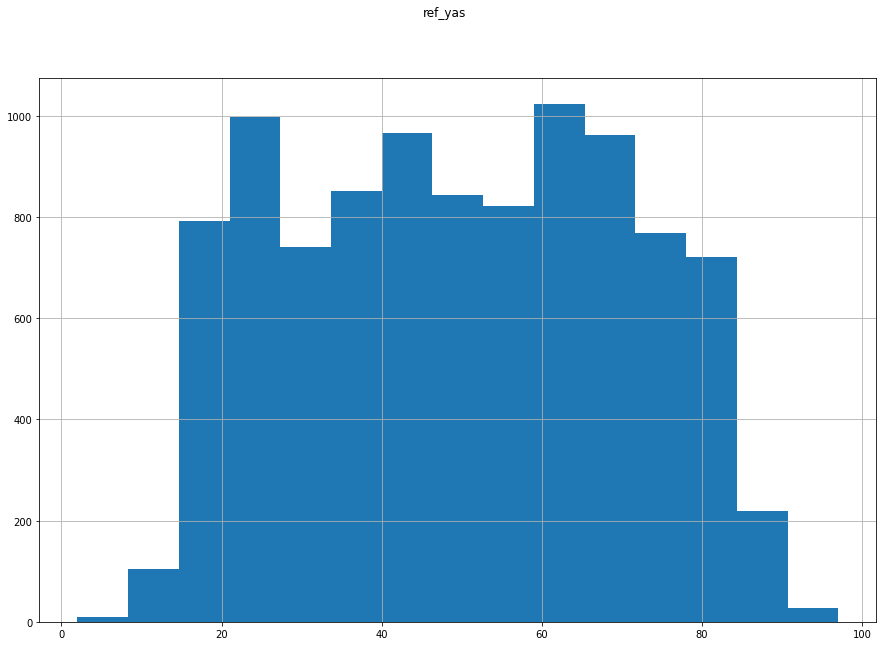

In [26]:
# Histograms plots for each numeric column
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    data[col].hist(bins=15, figsize=(15, 10))
    plt.suptitle(col)
    plt.show()

**Correlation Matrix**

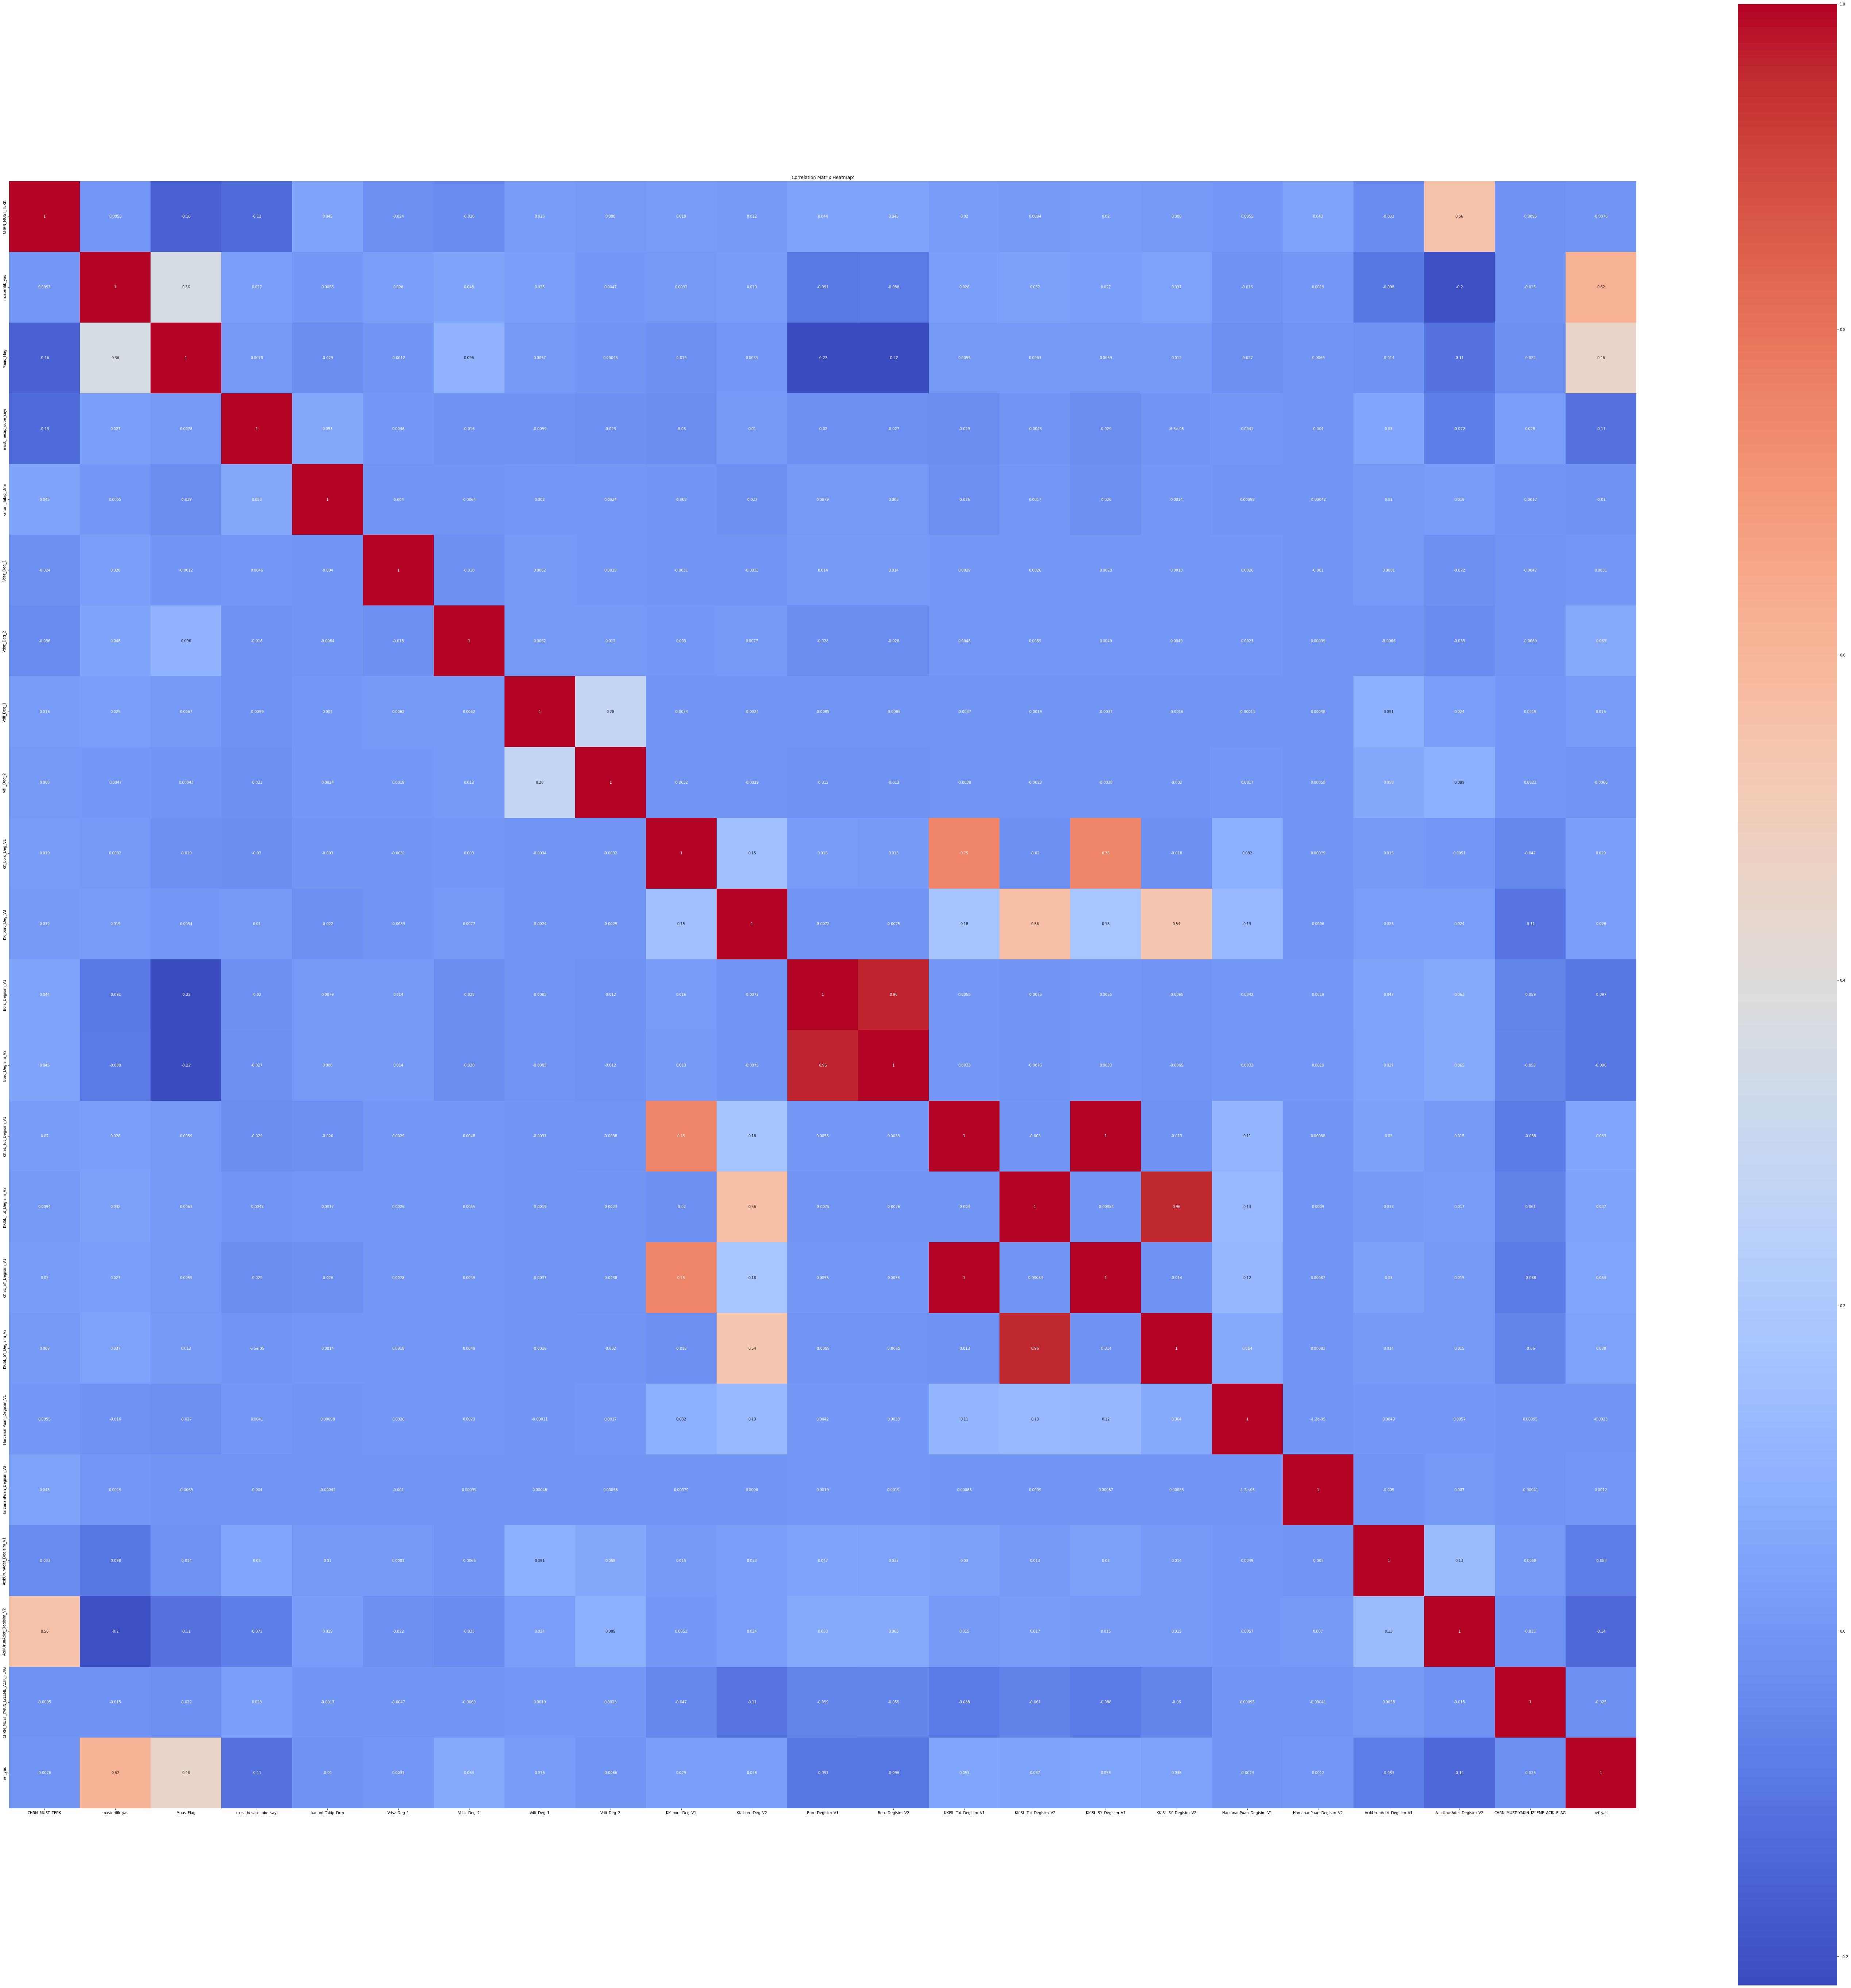

In [27]:
# Correlation matrix and heatmap
corr_matrix = data[numeric_cols].corr()
plt.figure(figsize=(100, 100))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix Heatmap'")
plt.show()

**Saving Cleaned Data**

In [28]:
# Save the cleaned dataset to an Excel file
output_file_path = 'cleaned_churn_data.xlsx'
data.to_excel(output_file_path, index=False)

output_file_path


<ipython-input-28-531d368a1891>:3: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.2.9' currently installed).
  data.to_excel(output_file_path, index=False)


'cleaned_churn_data.xlsx'

# Model Training
* Split the Data
* Feature Scaling
* Evaluation Metrics

## Splitting the Data

In [29]:
# Excluding Churn Column

x = data.drop("CHRN_MUST_TERK",axis=1)
y = data['CHRN_MUST_TERK']

In [30]:
# 70% of data for training , 30% of data for testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [31]:
X_train.shape, y_train.shape

((6892, 61), (6892,))

In [32]:
X_test.shape, y_test.shape

((2954, 61), (2954,))

## Feature Scaling
* All features must be on the same scale. This is called feature scaling.
* To prevent a single feature dominating the learning process, we need feature scaling. Many machine learning algorithms use distance-based calculations in order to block disproportionally influence on the results.

In [33]:
data.head()

,CHRN_MUST_TERK,musterilik_yas,Maas_Flag,must_hesap_sube_sayi,kanuni_Takip_Drm,Vdsz_Deg_1,Vdsz_Deg_2,Vdli_Deg_1,Vdli_Deg_2,KK_borc_Deg_V1,...,Hesap_Isl_Ucret_Flag_6,Hesap_Isl_Ucret_Flag_7,Hesap_Isl_Ucret_Flag_8,Hesap_Isl_Ucret_Flag_11,GecikmeFlag_Degisim_V1_0,GecikmeFlag_Degisim_V1_1,GecikmeFlag_Degisim_V1_2,GecikmeFlag_Degisim_V2_0,GecikmeFlag_Degisim_V2_1,GecikmeFlag_Degisim_V2_2
0,0,42,0,1,0,-0.40,0.81,0.0,0.0,0.0,...,False,False,False,False,True,False,False,True,False,False
1,0,55,0,1,0,0.00,0.00,0.0,0.0,0.0,...,False,False,False,False,True,False,False,True,False,False
2,0,30,1,1,0,-0.35,-0.25,0.0,0.0,0.0,...,False,False,False,False,True,False,False,True,False,False
3,0,15,1,1,0,1.21,2.89,0.0,0.0,0.0,...,False,False,False,False,True,False,False,True,False,False
4,0,202,1,1,0,-0.55,25.79,0.0,0.0,0.0,...,False,False,False,False,True,False,False,True,False,False


In [34]:
columns_to_check = data.columns
columns_needs_to_be_scaled = []

for column in columns_to_check:
    if (data[column] > 1).any() or (data[column] < 0).any():
        columns_needs_to_be_scaled.append(column)

print("Columns with values greater than 1 or less than 0:")
print(columns_needs_to_be_scaled)

Columns with values greater than 1 or less than 0:
['musterilik_yas', 'must_hesap_sube_sayi', 'Vdsz_Deg_1', 'Vdsz_Deg_2', 'Vdli_Deg_1', 'Vdli_Deg_2', 'KK_borc_Deg_V1', 'KK_borc_Deg_V2', 'Borc_Degisim_V1', 'Borc_Degisim_V2', 'KKISL_Tut_Degisim_V1', 'KKISL_Tut_Degisim_V2', 'KKISL_SY_Degisim_V1', 'KKISL_SY_Degisim_V2', 'HarcananPuan_Degisim_V1', 'HarcananPuan_Degisim_V2', 'AcıkUrunAdet_Degisim_V1', 'AcıkUrunAdet_Degisim_V2', 'ref_yas']


These columns need scaling. MinMax Scaler is used becuase majority of variables in binary.

In [35]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['musterilik_yas', 'must_hesap_sube_sayi', 'Vdsz_Deg_1', 'Vdsz_Deg_2', 'Vdli_Deg_1',\
                    'Vdli_Deg_2', 'KK_borc_Deg_V1', 'KK_borc_Deg_V2', 'Borc_Degisim_V1', 'Borc_Degisim_V2',\
                    'KKISL_Tut_Degisim_V1', 'KKISL_Tut_Degisim_V2', 'KKISL_SY_Degisim_V1', \
                    'KKISL_SY_Degisim_V2', 'HarcananPuan_Degisim_V1', 'HarcananPuan_Degisim_V2', \
                    'AcıkUrunAdet_Degisim_V1', 'AcıkUrunAdet_Degisim_V2', 'ref_yas']

scaler = MinMaxScaler()

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

* .fit_transform() shows scaling parameters and apply to tranform, so training date is properly scaled
* For test data, .transform() is used because not to change scaling parameters. Learnings from the training data is wanted to be applied. 

In [36]:
X_train.head()

,musterilik_yas,Maas_Flag,must_hesap_sube_sayi,kanuni_Takip_Drm,Vdsz_Deg_1,Vdsz_Deg_2,Vdli_Deg_1,Vdli_Deg_2,KK_borc_Deg_V1,KK_borc_Deg_V2,...,Hesap_Isl_Ucret_Flag_6,Hesap_Isl_Ucret_Flag_7,Hesap_Isl_Ucret_Flag_8,Hesap_Isl_Ucret_Flag_11,GecikmeFlag_Degisim_V1_0,GecikmeFlag_Degisim_V1_1,GecikmeFlag_Degisim_V1_2,GecikmeFlag_Degisim_V2_0,GecikmeFlag_Degisim_V2_1,GecikmeFlag_Degisim_V2_2
10218,0.908555,1,0.090909,0,0.009619,0.011445,0.5,0.436681,0.88,0.775194,...,False,False,False,False,True,False,False,True,False,False
1981,0.182891,0,0.090909,0,0.001762,0.003468,0.5,0.436681,0.88,0.775194,...,False,False,False,False,True,False,False,True,False,False
6132,0.342183,0,0.090909,0,0.000247,0.010405,0.5,0.436681,0.88,0.775194,...,False,False,False,False,True,False,False,True,False,False
7978,0.466077,1,0.090909,0,0.002378,0.009711,0.5,0.436681,0.88,0.775194,...,False,False,False,False,True,False,False,True,False,False
11773,0.309735,0,0.090909,0,0.000141,0.003468,0.5,0.436681,0.88,0.775194,...,False,False,False,False,True,False,False,True,False,False


In [37]:
X_test.head()

,musterilik_yas,Maas_Flag,must_hesap_sube_sayi,kanuni_Takip_Drm,Vdsz_Deg_1,Vdsz_Deg_2,Vdli_Deg_1,Vdli_Deg_2,KK_borc_Deg_V1,KK_borc_Deg_V2,...,Hesap_Isl_Ucret_Flag_6,Hesap_Isl_Ucret_Flag_7,Hesap_Isl_Ucret_Flag_8,Hesap_Isl_Ucret_Flag_11,GecikmeFlag_Degisim_V1_0,GecikmeFlag_Degisim_V1_1,GecikmeFlag_Degisim_V1_2,GecikmeFlag_Degisim_V2_0,GecikmeFlag_Degisim_V2_1,GecikmeFlag_Degisim_V2_2
12641,0.454277,1,0.090909,0,0.001656,0.003642,0.5,0.436681,0.88,0.775194,...,False,False,False,False,True,False,False,True,False,False
12663,0.224189,0,0.090909,0,0.001762,0.003468,0.5,0.454148,0.88,0.775194,...,False,False,False,False,True,False,False,True,False,False
136,0.616519,0,0.181818,0,0.004140,0.001769,0.5,0.401747,0.88,0.775194,...,False,False,False,False,True,False,False,True,False,False
1868,0.126844,0,0.090909,0,0.001638,0.002532,0.5,0.436681,0.88,0.775194,...,False,False,False,False,True,False,False,True,False,False
1950,0.035398,0,0.090909,0,0.001127,0.007387,0.5,0.436681,0.88,0.775194,...,False,False,False,False,True,False,False,True,False,False


## Handling Imbalanced Data

In [38]:
class_counts = data['CHRN_MUST_TERK'].value_counts()
class_counts

CHRN_MUST_TERK
0    9329
1     517
Name: count, dtype: int64

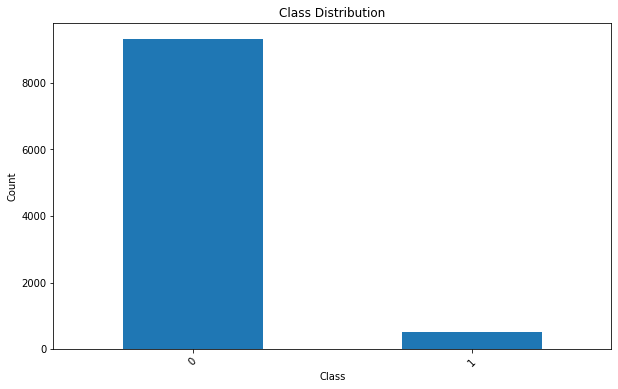

In [39]:
plt.figure(figsize=(10, 6)) 
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**SMOTE**

Since Imbalanced Data is detected, SMOTE is applied. 

In [40]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [41]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [42]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [43]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2798
           1       0.82      0.83      0.82       156

    accuracy                           0.98      2954
   macro avg       0.90      0.91      0.91      2954
weighted avg       0.98      0.98      0.98      2954



**Visualizing the change after Random Forest Classifier Model Training application**

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

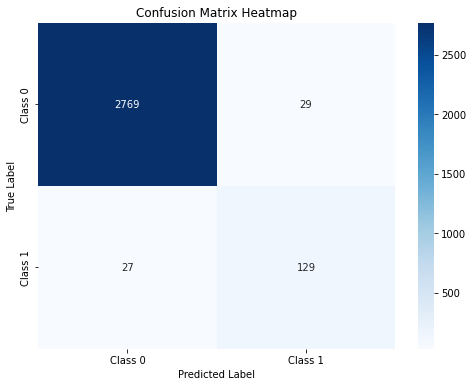

In [45]:
# Plot the heatmap of the confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Model Selection and Evaluation


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Initialize models
logreg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)

# List of models to evaluate
models = {
    'Logistic Regression': logreg,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'Gradient Boosting': gradient_boosting
}

# Function to train and evaluate models
def evaluate_model(model, X_train_smote, y_train_smote, X_test, y_test):
    # Train the model
    model.fit(X_train_smote, y_train_smote)
    
    # Predict on test data
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics such as accuracy, f1 score and Auc
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    print(f'Accuracy: {accuracy:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'AUC-ROC: {auc:.4f}')
    print('\nClassification Report:\n', classification_report(y_test, y_test_pred))
    print('-' * 50)

# Evaluate all models
for name, model in models.items():
    print(f'Evaluating {name}...')
    evaluate_model(model, X_train_smote, y_train_smote, X_test, y_test)
    print('\n')


Evaluating Logistic Regression...


/Users/aleynacakir/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9513
F1 Score: 0.6682
AUC-ROC: 0.9806

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      2798
           1       0.52      0.93      0.67       156

    accuracy                           0.95      2954
   macro avg       0.76      0.94      0.82      2954
weighted avg       0.97      0.95      0.96      2954

--------------------------------------------------


Evaluating Decision Tree...
Accuracy: 0.9814
F1 Score: 0.8243
AUC-ROC: 0.9085

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2798
           1       0.82      0.83      0.82       156

    accuracy                           0.98      2954
   macro avg       0.91      0.91      0.91      2954
weighted avg       0.98      0.98      0.98      2954

--------------------------------------------------


Evaluating Random Forest...
Accuracy: 0.9810
F1 Score: 0.8217


## Hyperparameter Tuning with Grid Search / Random Search
* Perform grid search or random search for hyperparameter optimization to find the best model parameters.

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [48]:
# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for Random Forest
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters and model evaluation
print("Best Parameters:", grid_search.best_params_, "\n")
best_model = grid_search.best_estimator_
evaluate_model(best_model, X_train_smote, y_train_smote, X_test, y_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100} 

Accuracy: 0.9810
F1 Score: 0.8217
AUC-ROC: 0.9861

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2798
           1       0.82      0.83      0.82       156

    accuracy                           0.98      2954
   macro avg       0.90      0.91      0.91      2954
weighted avg       0.98      0.98      0.98      2954

--------------------------------------------------


In [49]:
# Hyperparameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# RandomizedSearchCV for Gradient Boosting
random_search = RandomizedSearchCV(
    estimator=gradient_boosting, 
    param_distributions=param_grid, 
    n_iter=10,  # number of parameter settings that are sampled
    cv=3,  # reduce the number of folds for cross-validation
    scoring='f1', 
    n_jobs=-1, 
    verbose=2, 
    random_state=42
)
random_search.fit(X_train_smote, y_train_smote)

# Best parameters and model evaluation
print("Best Parameters:", random_search.best_params_, "\n")
best_model = random_search.best_estimator_
evaluate_model(best_model, X_train_smote, y_train_smote, X_test, y_test)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10} 

Accuracy: 0.9851
F1 Score: 0.8634
AUC-ROC: 0.9942

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2798
           1       0.84      0.89      0.86       156

    accuracy                           0.99      2954
   macro avg       0.92      0.94      0.93      2954
weighted avg       0.99      0.99      0.99      2954

--------------------------------------------------


**After hyperparameter tuning, the performance of the model improved. So, Gradient Boosting is chosen.**

## Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix

# Calculate predictions for the training set using a threshold of 0.50
train_predictions = (gradient_boosting.predict_proba(X_train_smote)[:, 1] >= 0.50).astype(int)
train_confusion_matrix = confusion_matrix(y_train_smote, train_predictions)

# Calculate predictions for the test set using a threshold of 0.50
test_predictions = (gradient_boosting.predict_proba(X_test)[:, 1] >= 0.50).astype(int)
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

# Calculate the total number of samples in each set
train_total = len(y_train_smote)
test_total = len(y_test)

# Calculate the confusion matrix in percentage form for the training set
train_confusion_matrix_percent = train_confusion_matrix / train_total * 100

# Calculate the confusion matrix in percentage form for the test set
test_confusion_matrix_percent = test_confusion_matrix / test_total * 100

# Create a dataframe for the confusion matrix
confusion_matrix_df = pd.DataFrame({'Training Set': train_confusion_matrix_percent.flatten(),
                                    'Test Set': test_confusion_matrix_percent.flatten()},
                                   index=['True Positive (%)', 'True Negative (%)', 'False Positive (%)', 'False Negative (%)', ])
#
confusion_matrix_df

,Training Set,Test Set
True Positive (%),49.326290,92.890995
True Negative (%),0.673710,1.828030
False Positive (%),0.244985,0.473934
False Negative (%),49.755015,4.807041


# Important Features

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_classifier.fit(X_train_smote, y_train_smote)

importances = rf_classifier.feature_importances_

feature_importance_data = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

feature_importance_data = feature_importance_data.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance_data.head(10)

,Feature,Importance
0,AcıkUrunAdet_Degisim_V2,0.476908
1,must_hesap_sube_sayi,0.126885
2,Vdsz_Deg_2,0.065219
3,Maas_Flag,0.058284
4,Vdsz_Deg_1,0.052223
5,musterilik_yas,0.049939
6,ref_yas,0.041249
7,Vdli_Deg_2,0.015760
8,AcıkUrunAdet_Degisim_V1,0.014918
9,Vdli_Deg_1,0.011764


In [52]:
feature_importance_data["Importance"][:7].sum()

0.8707049211377922

 **The result shows that 7 variables are important for the analysis. These variables are:**

* **AcıkUrunAdet_Degisim_V2:** Represents the change in the number of open (active) products (e.g., credit cards, loans, deposit accounts) the customer has, in the second version (V2). It reflects whether the number of open products has increased or decreased over a certain period.

* **must_hesap_sube_sayi:** Indicates the number of branches the customer's accounts are linked to. It shows if the customer has accounts associated with multiple branches.

* **Vdsz_Deg_2:** Represents the change in the customer's non-term (vadesiz) accounts in the second version (V2). This could reflect changes in balances or the number of non-term accounts over time.

* **Maas_Flag:** Indicates whether the customer receives a salary. Typically coded as 0 (no) or 1 (yes), where 1 means the customer receives a salary.

* **Vdsz_Deg_1:** Represents the change in the customer's non-term (vadesiz) accounts in the first version (V1). Similar to Vdsz_Deg_2, but for a different time period or a different calculation.

* **musterilik_yas:** Indicates the number of years the customer has been with the company.

* **ref_yas:** Represents the customer's age.

These 7 variables together account for approximately **87%** of the importance for the analysis. 
This means that they are the most important variables to consider when trying to predict customer churn.

# Saving Model

In [53]:
import joblib


joblib.dump(gradient_boosting, 'customer_churn_classifier.pkl')

['customer_churn_classifier.pkl']

# Outcome

The goal of this customer churn prediction project is to build a machine learning model that can predict whether customers are likely to leave. The prediction is based on various customer details, such as changes in the number of open products they have (**AcıkUrunAdet_Degisim_V2**), the number of branches their accounts are associated with (**must_hesap_sube_sayi**), changes in their non-term account balances (**Vdsz_Deg_2** and **Vdsz_Deg_1**), whether they receive a salary (**Maas_Flag**), how long they have been a customer (**musterilik_yas**), and their age (**ref_yas**). 

The main purpose of the model is to identify customers who are at risk of leaving so the business can take steps to keep them. By using this model, the company can better manage resources, create personalized engagement strategies, and focus on retaining those customers. The project's success is measured by how accurately the model can predict churn, helping the company reduce the number of customers leaving, improve customer satisfaction, and strengthen its retention efforts.